In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

In [3]:
data = pd.read_excel('dataset.xlsx')
data.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW)  Serum Glucose  \
0                                      NaN            NaN   
1                                -0.625073      -0.140648   
2                                      NaN            NaN   
3                                      NaN            NaN   
4                                      NaN            NaN   

  Respiratory Syncytial Virus   Influenza A   Influenza B Parainfluenza 1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  CoronavirusNL63 Rhinovirus/Enterovirus  Mycoplasma pneumoniae  \
0             NaN                    

# Analyse de la Forme de données


##### Il faut mettre une copie de notre dataset

In [4]:
df = data.copy()

### Definir notre target variable : "SARS-Cov-2 exam result"

###  Definir lignes et colones :

In [5]:
df.shape

(5644, 111)

### Definir types de var :
        qualitatives : 70
        quantitatives :41

In [6]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

### Analyse des valeurs manquantes

<AxesSubplot:>

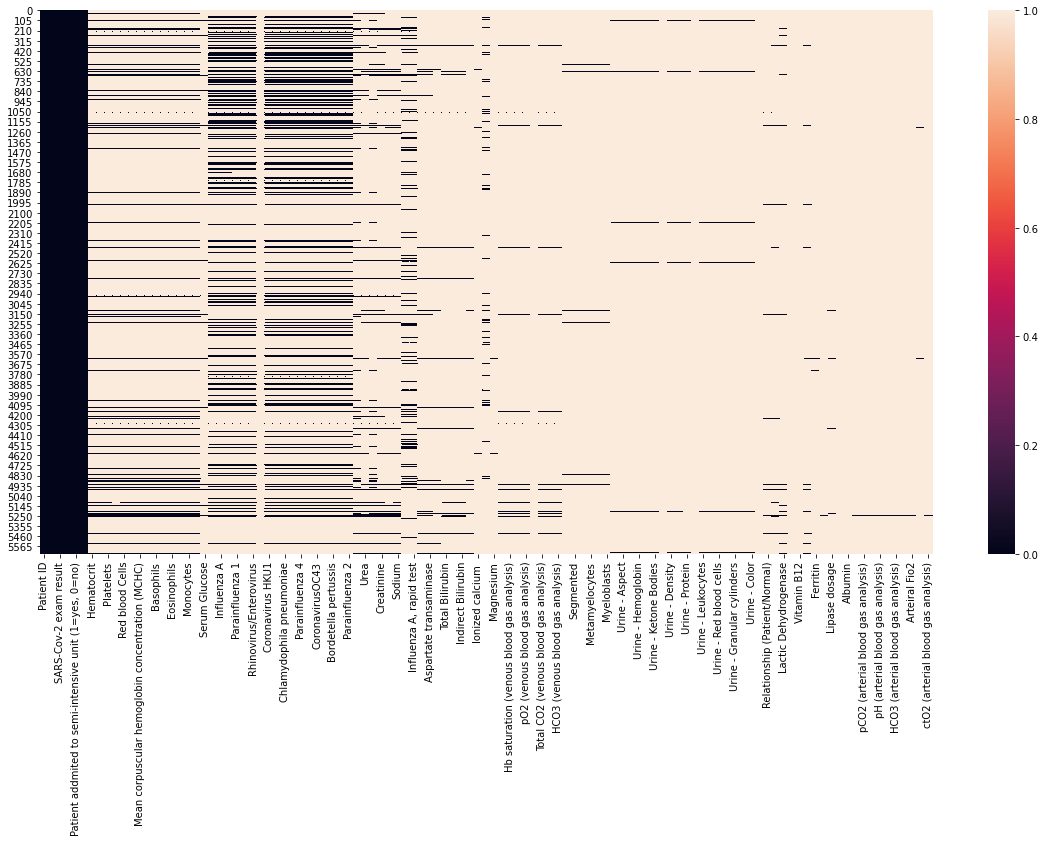

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap (df.isna())

In [8]:
(df.isna().sum()/df.shape[0]).sort_values(ascending = True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

# Analyse du Fond

### Visulation initiale - Elimintion des colonnes manq

In [9]:
df= df[df.columns[df.isna().sum()/df.shape[0] < 0.9] ]

<AxesSubplot:>

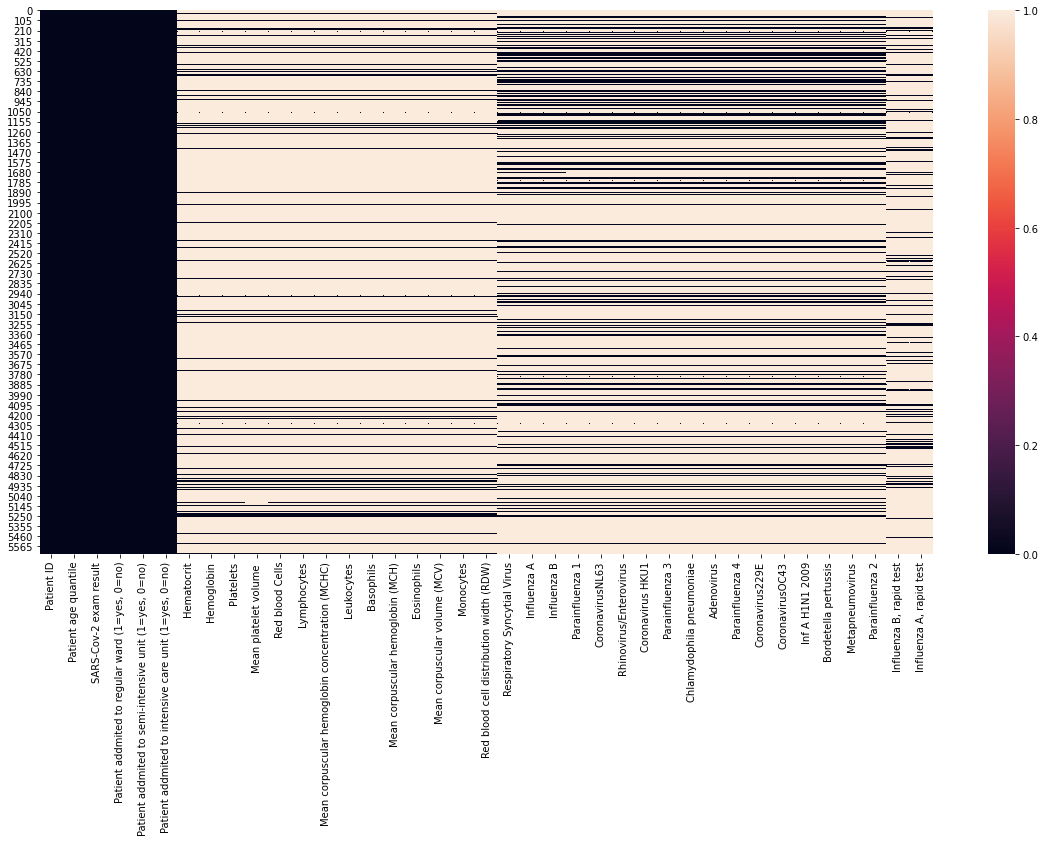

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap (df.isna())

In [11]:
# on elimine la colonnes passion ID
df = df.drop('Patient ID',axis =1) #axis = 1 cvd les colonnes

In [12]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

### Examen de la colonne Target

In [13]:
## Pourcentage des cas posisives et nega
#(df['SARS-Cov-2 exam result'].value_counts())/df.shape[0]*100
df['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

### Histogrames des Var continues

C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

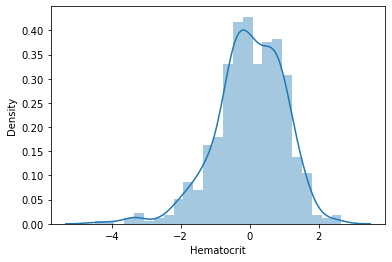

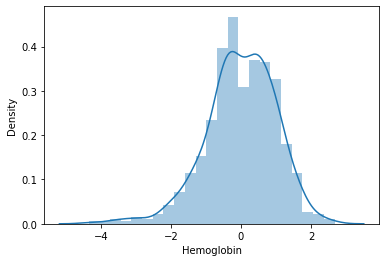

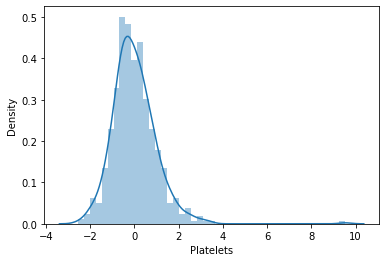

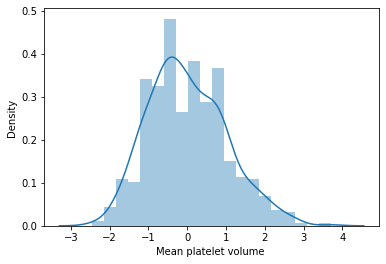

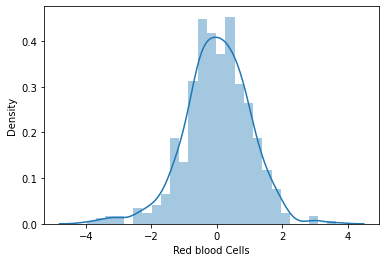

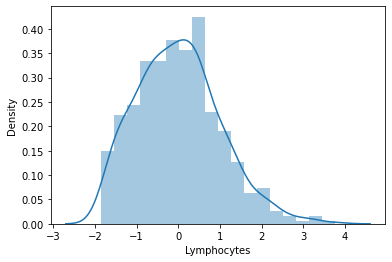

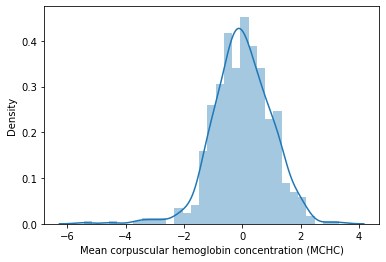

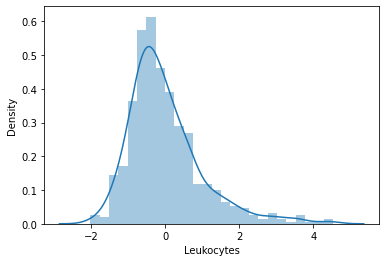

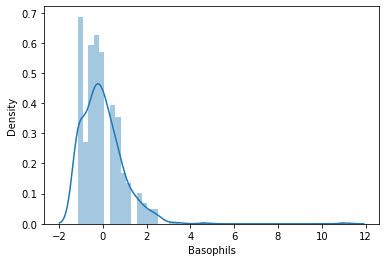

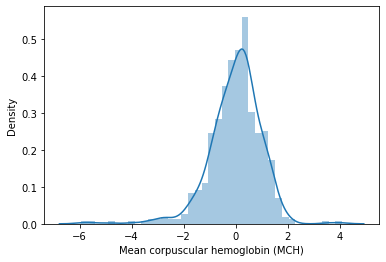

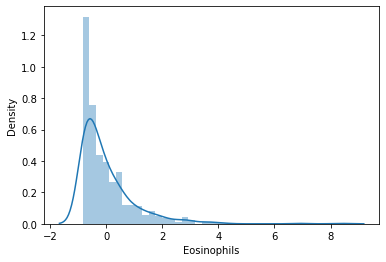

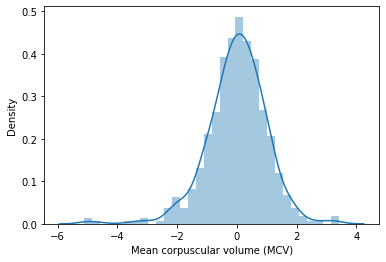

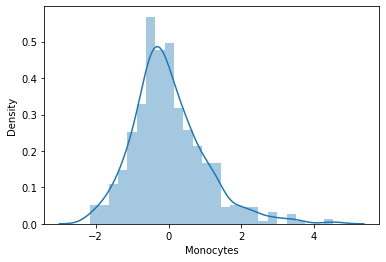

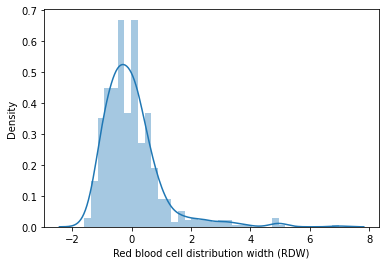

In [14]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

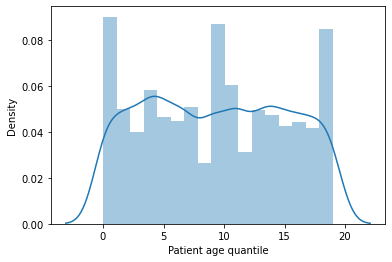

In [15]:
sns.distplot(df['Patient age quantile'])

### Variables Qualitatives

In [16]:
df["SARS-Cov-2 exam result"].unique()

array(['negative', 'positive'], dtype=object)

In [17]:
for col in df.select_dtypes('object'):
    print(f'{col :-<40} {df[col].unique()}')

SARS-Cov-2 exam result------------------ ['negative' 'positive']
Respiratory Syncytial Virus------------- [nan 'not_detected' 'detected']
Influenza A----------------------------- [nan 'not_detected' 'detected']
Influenza B----------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus------------------ [nan 'detected' 'not_detected']
Coronavirus HKU1------------------------ [nan 'not_detected' 'detected']
Parainfluenza 3------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae---------------- [nan 'not_detected' 'detected']
Adenovirus------------------------------ [nan 'not_detected' 'detected']
Parainfluenza 4------------------------- [nan 'not_detected' 'detected']
Coronavirus229E------------------------- [nan 'not_detected' 'detected']
CoronavirusOC43------------------------- [nan 'not_detected

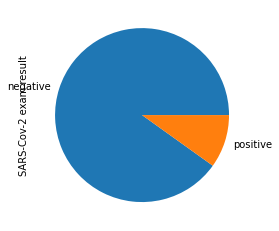

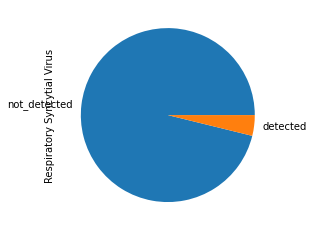

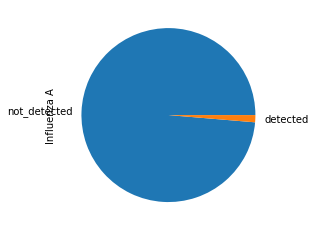

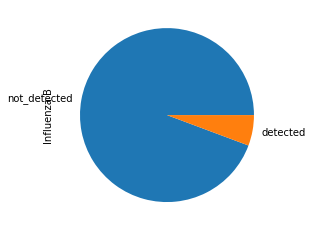

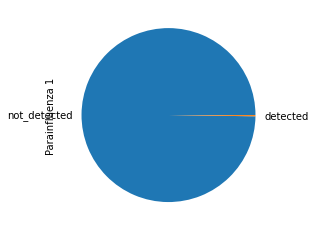

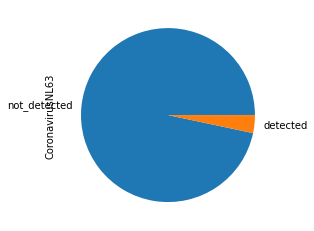

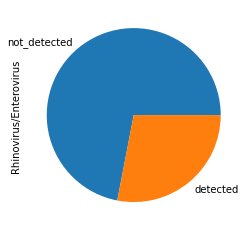

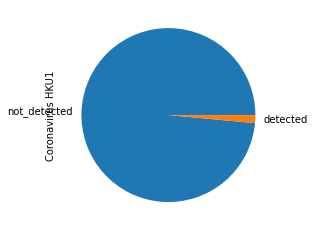

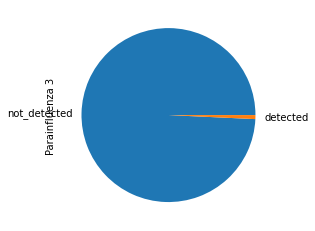

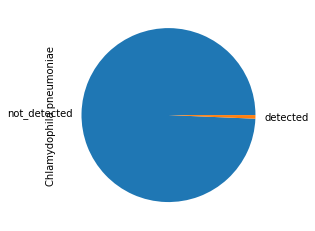

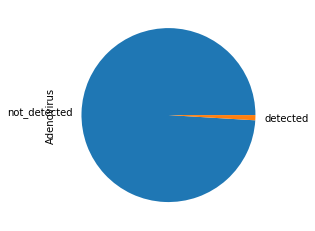

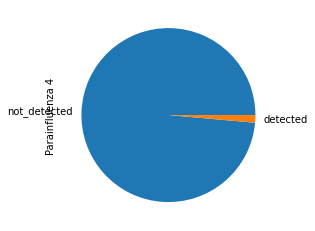

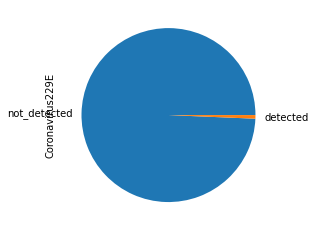

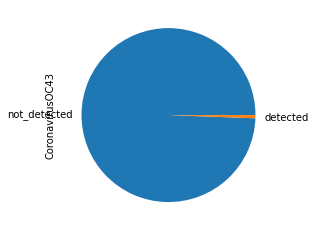

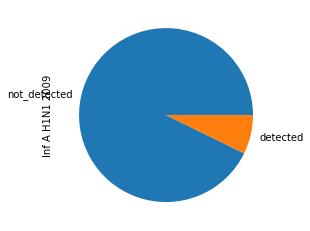

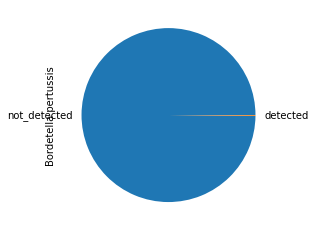

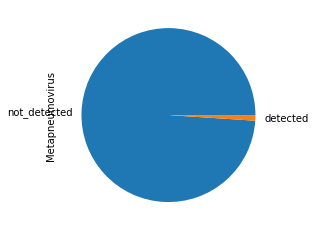

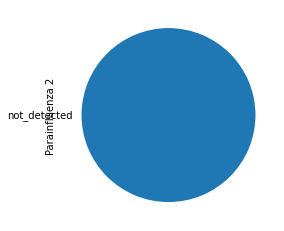

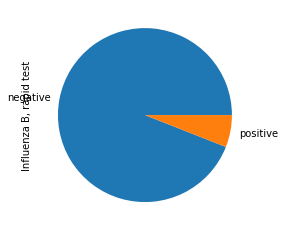

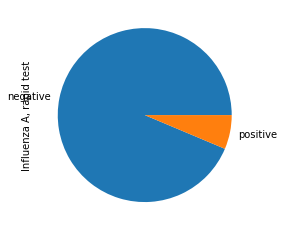

In [18]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

## Relation Target / Variables

### Creation de sous-ensembles positifs et negatifs

In [19]:
positive_df= df [df['SARS-Cov-2 exam result']== 'positive']

In [20]:
negative_df= df [df['SARS-Cov-2 exam result']== 'negative']

### Creation de sous ensembles Blood et viral

In [21]:
missing_rate = df.isna().sum()/df.shape[0]

In [22]:
blood_colomns = df.columns[(missing_rate <0.9) &( missing_rate  > 0.88)]

In [23]:
viral_colomns = df.columns[(missing_rate <0.88) &( missing_rate  > 0.75)]

## Target / Blood

C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


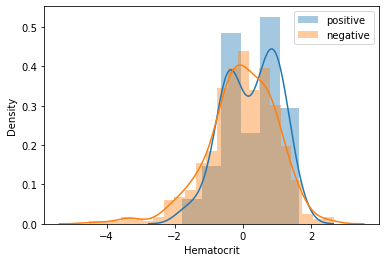

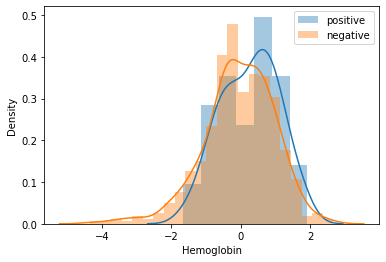

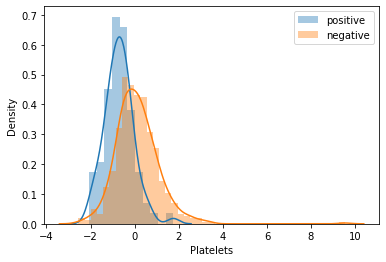

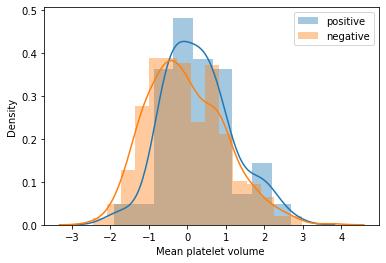

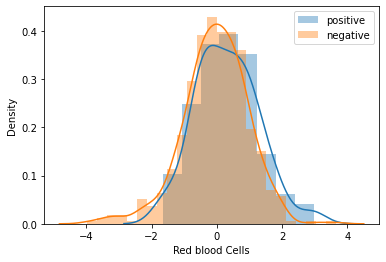

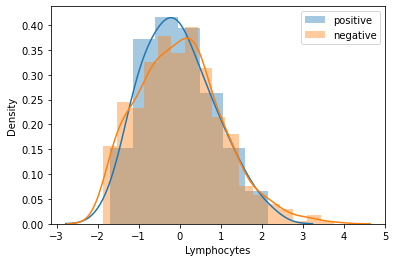

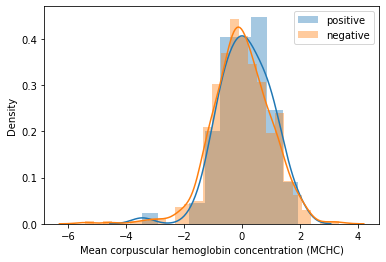

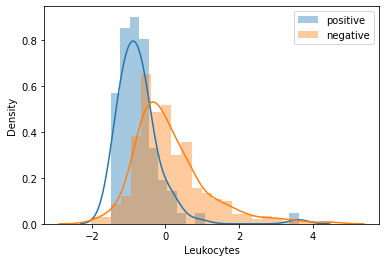

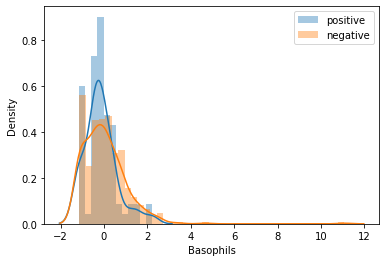

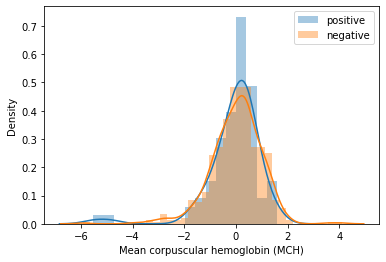

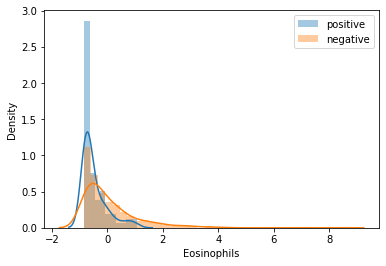

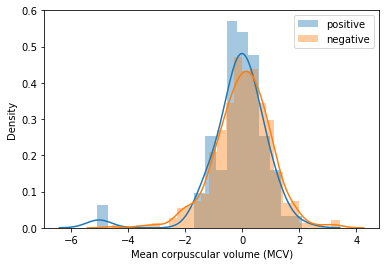

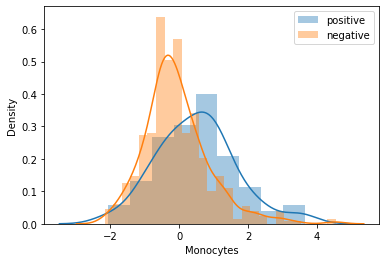

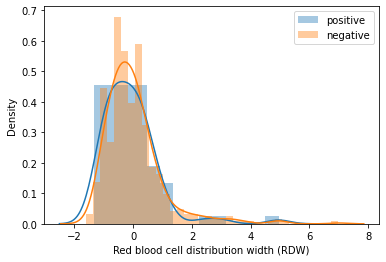

In [24]:
for col in blood_colomns :
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

#### Relation Variables / Target : 
    - target / blood : les taux de Monocytes, Platelets, Leukocytes semblés lies au covid-19

## Relation Target / age :

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

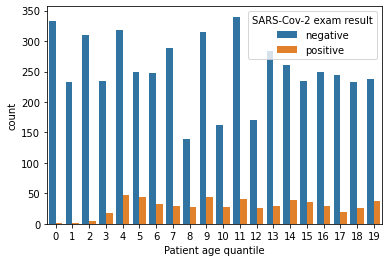

In [25]:
sns.countplot(x= 'Patient age quantile', hue = 'SARS-Cov-2 exam result', data = df)

## Relation Target / Viral :

In [26]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

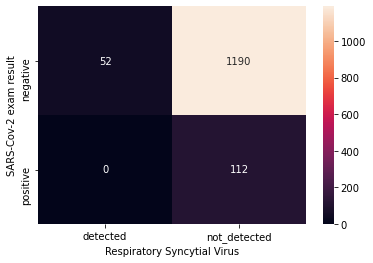

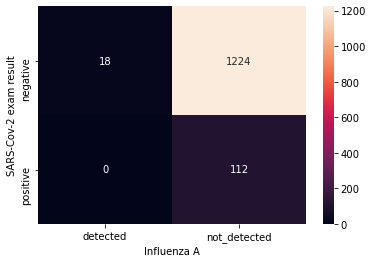

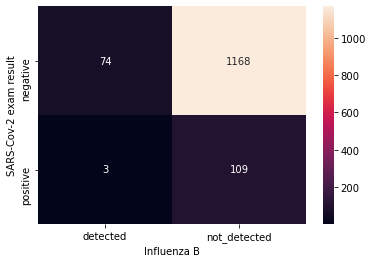

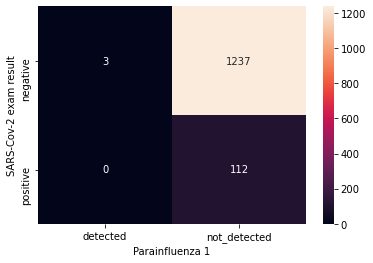

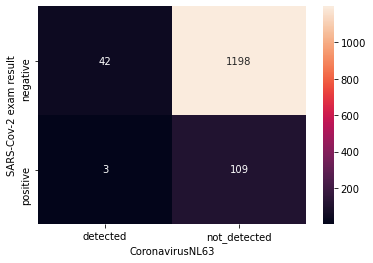

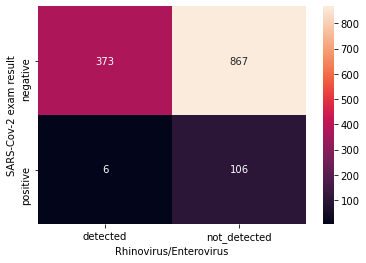

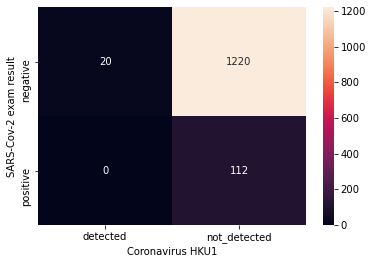

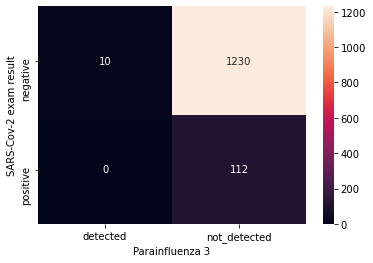

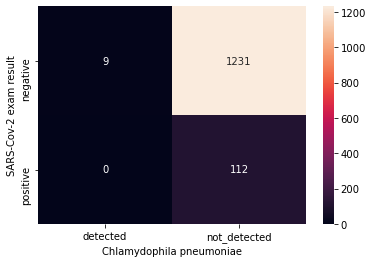

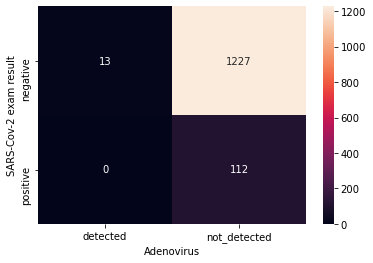

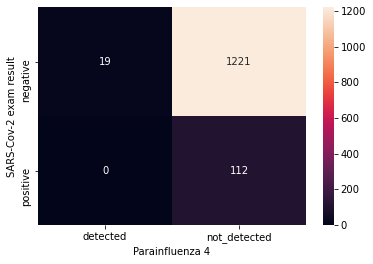

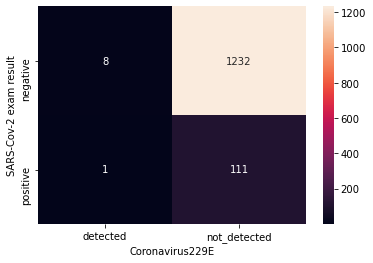

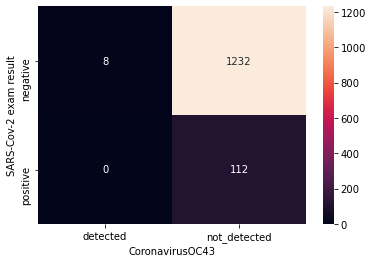

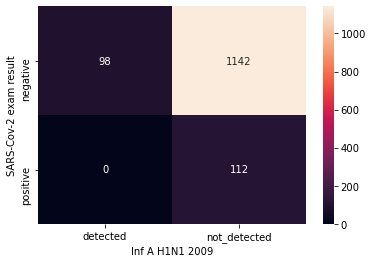

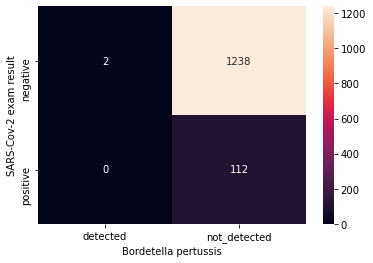

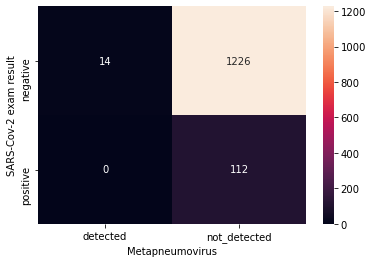

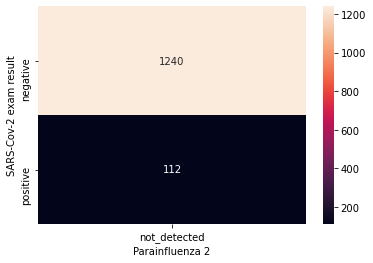

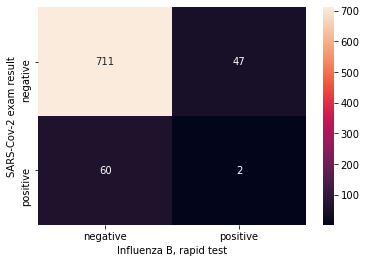

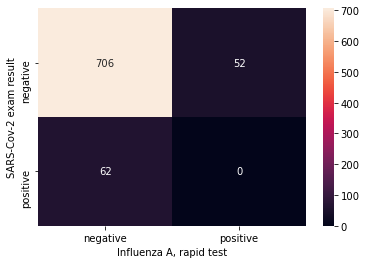

In [27]:
for col in viral_colomns : 
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]),annot =True , fmt = 'd')

# Analyse plus detaillée

## Relation Variables / Variables

### Relations Taux Sanguin

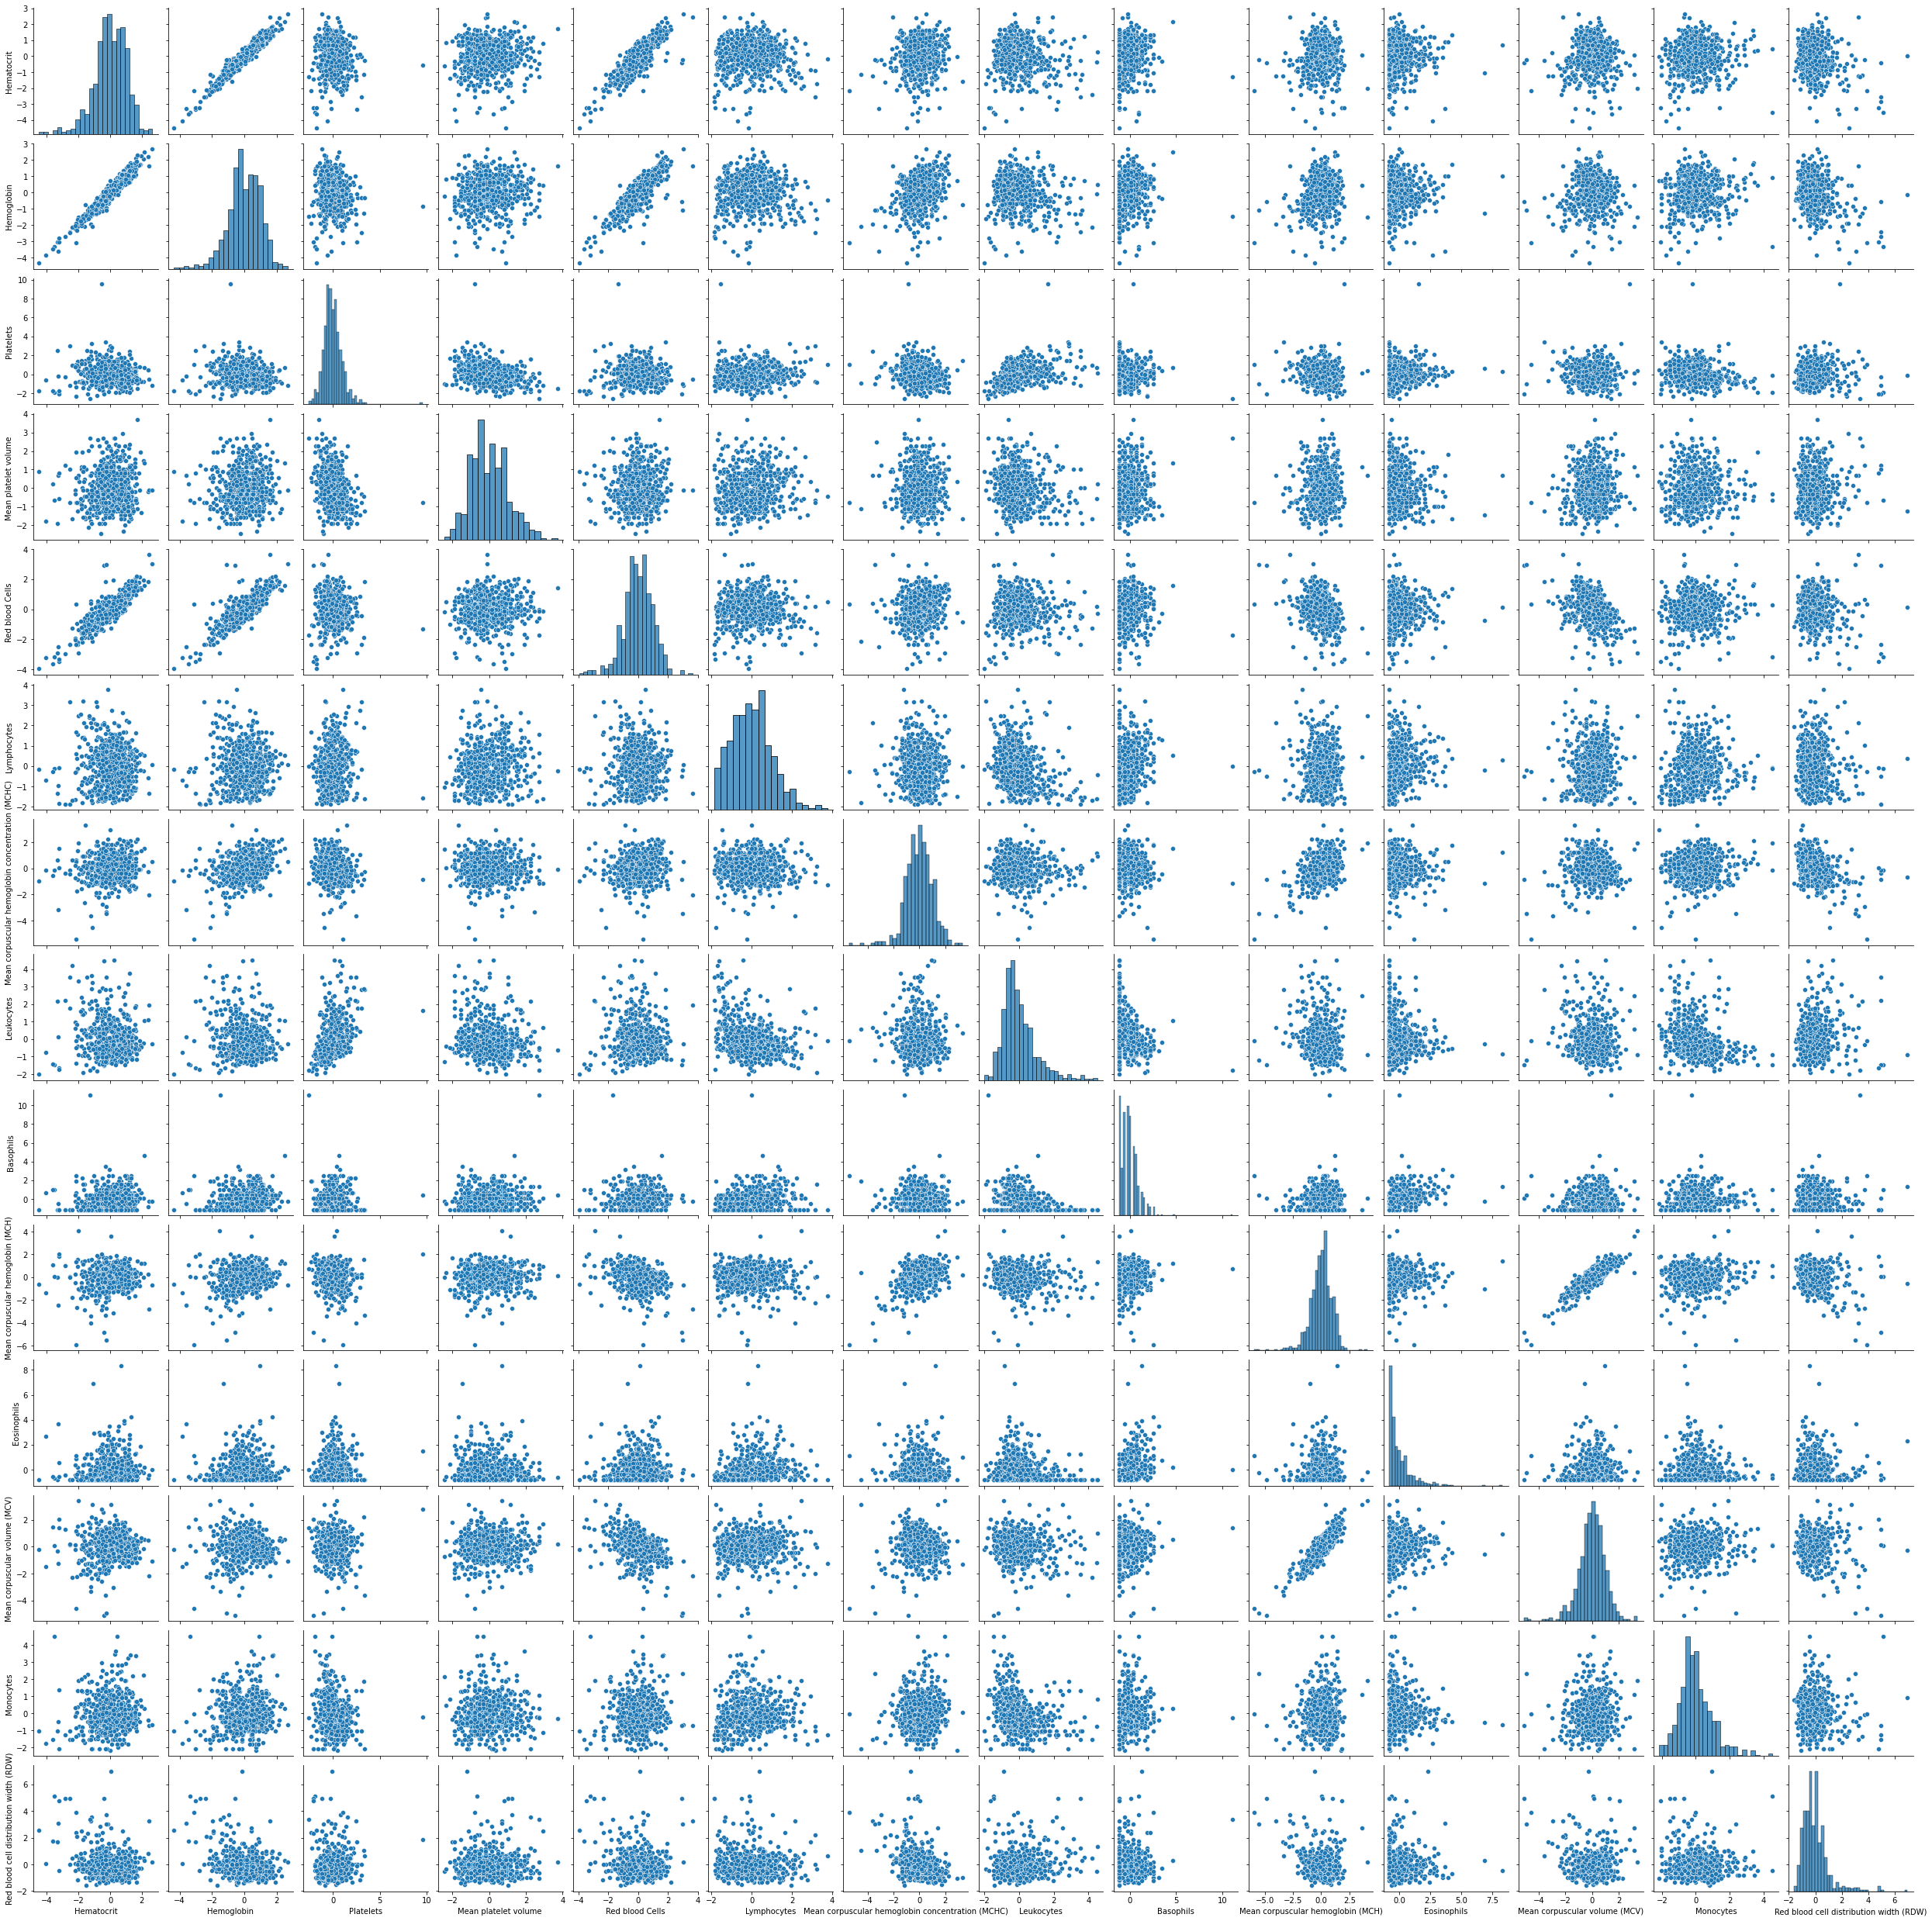

In [28]:
sns.pairplot(df[blood_colomns])

<AxesSubplot:>

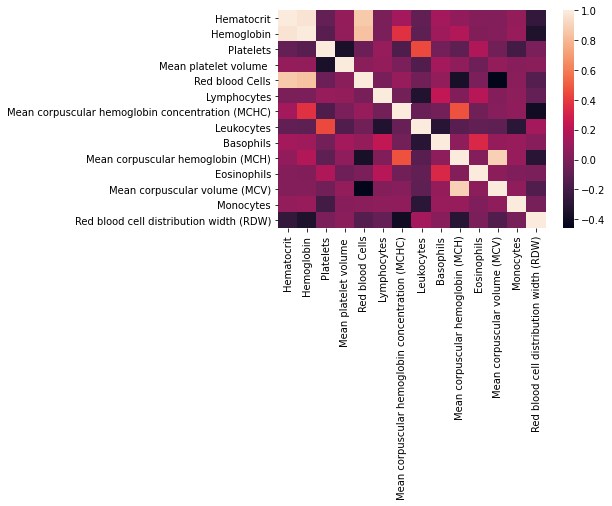

In [29]:
sns.heatmap(df[blood_colomns].corr())

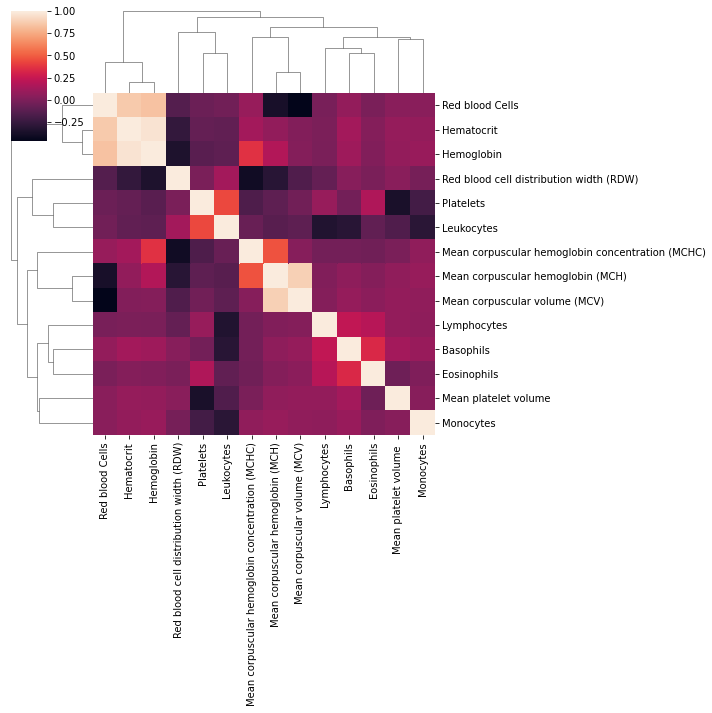

In [30]:
sns.clustermap(df[blood_colomns].corr())

### Relation Age / Sang

<ipython-input-31-71c6a1ec47ba>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

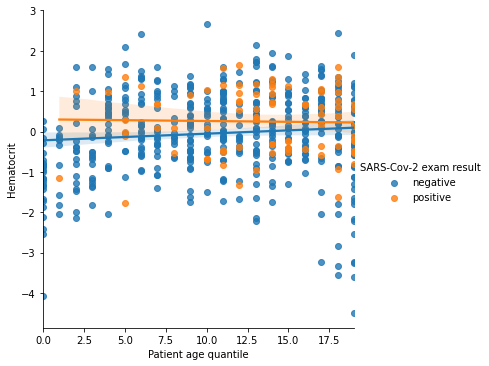

<Figure size 432x288 with 0 Axes>

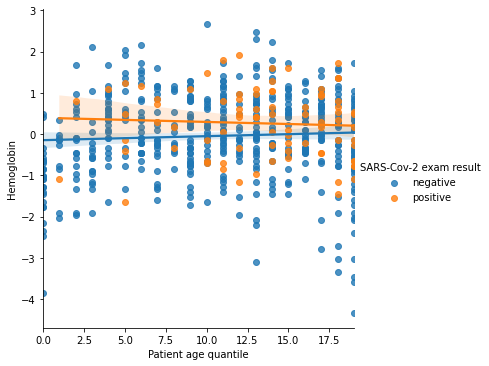

<Figure size 432x288 with 0 Axes>

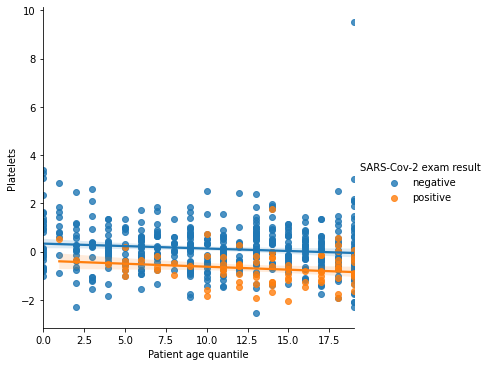

<Figure size 432x288 with 0 Axes>

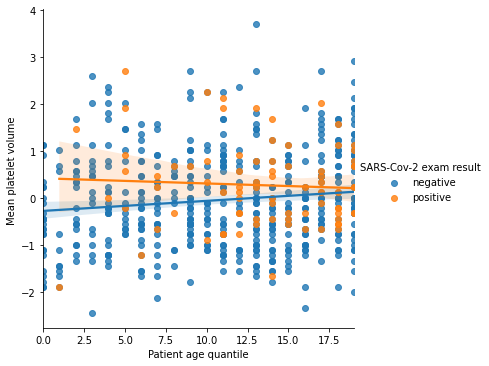

<Figure size 432x288 with 0 Axes>

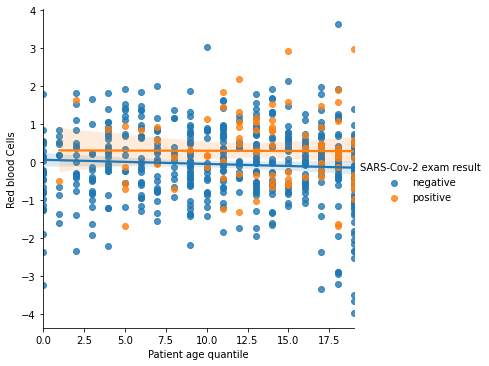

<Figure size 432x288 with 0 Axes>

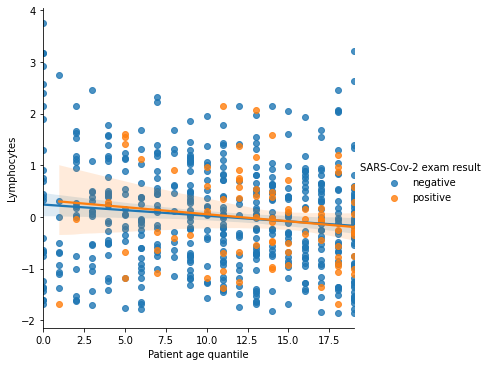

<Figure size 432x288 with 0 Axes>

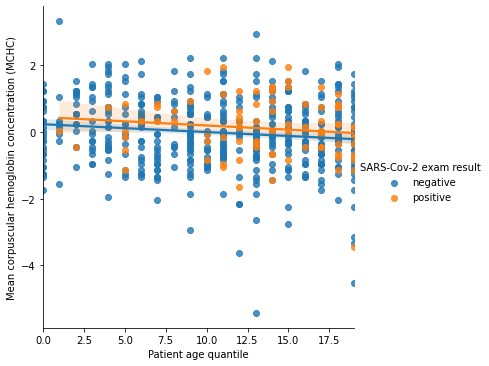

<Figure size 432x288 with 0 Axes>

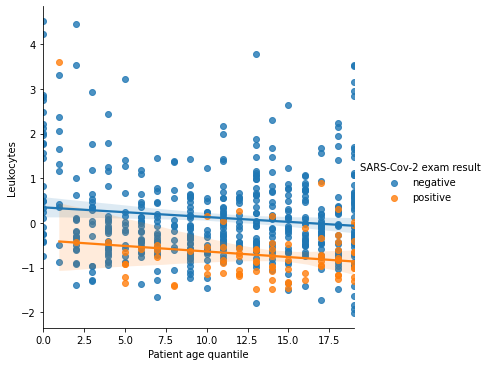

<Figure size 432x288 with 0 Axes>

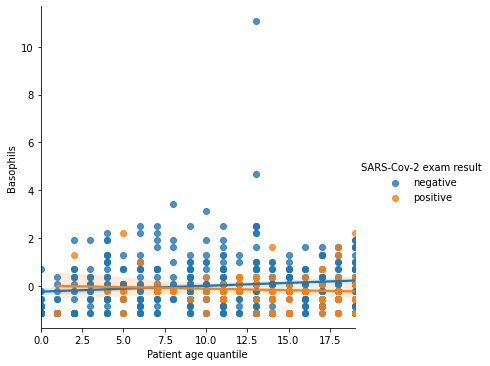

<Figure size 432x288 with 0 Axes>

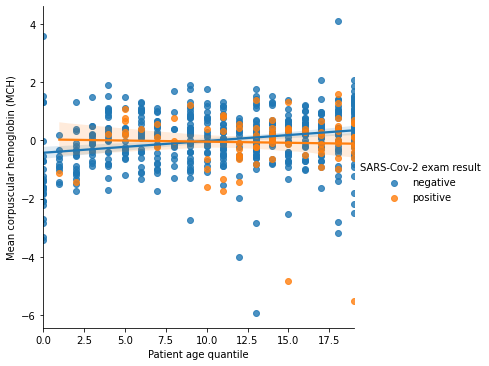

<Figure size 432x288 with 0 Axes>

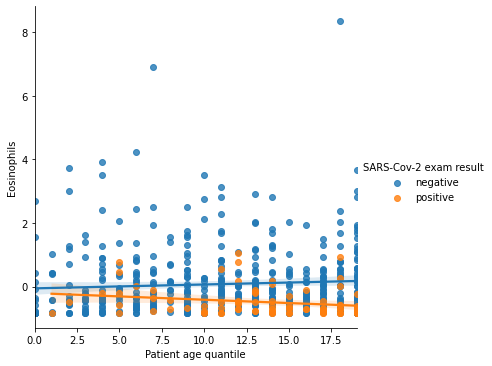

<Figure size 432x288 with 0 Axes>

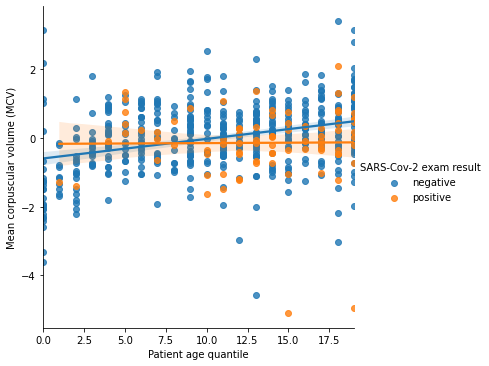

<Figure size 432x288 with 0 Axes>

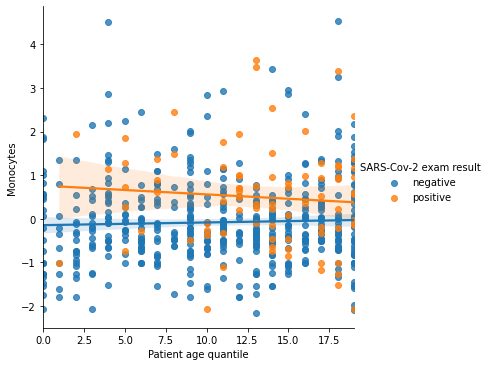

<Figure size 432x288 with 0 Axes>

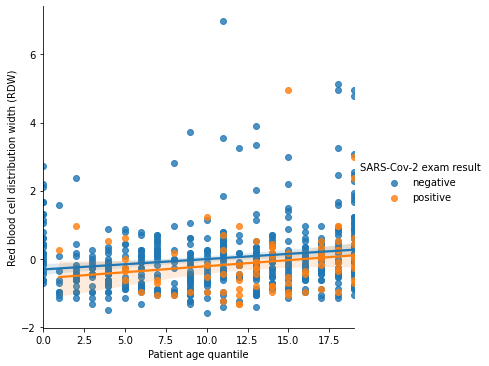

In [31]:
for col in blood_colomns:
    plt.figure()
    sns.lmplot(x='Patient age quantile',y=col, hue = 'SARS-Cov-2 exam result', data = df)

In [32]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

## Relation entre Influenza et rapid test

In [33]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [34]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

## Relation Viral /Sanguin

### Creation d'une nouvelle variable "est malade"

In [35]:
df["est malade"]= np.sum( df[viral_colomns[:-2]] == 'detected',axis =1) >= 1

In [36]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

In [37]:
malade_df = df[df['est malade']==True]
non_malade_df = df[df['est malade']==False]

C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

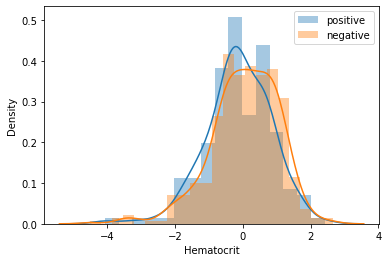

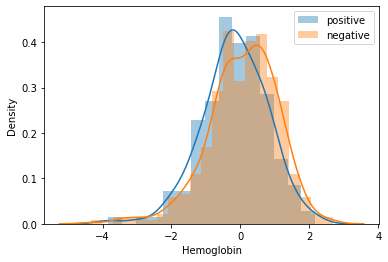

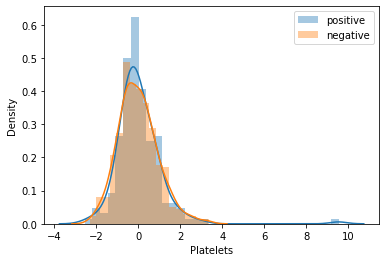

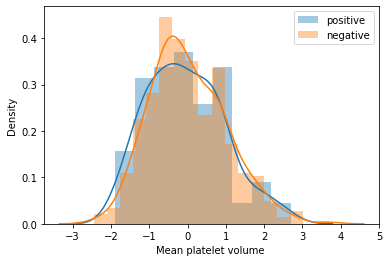

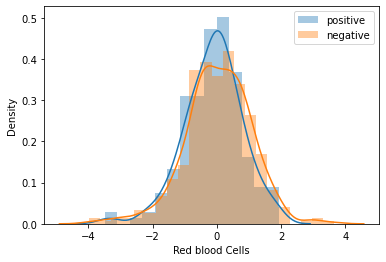

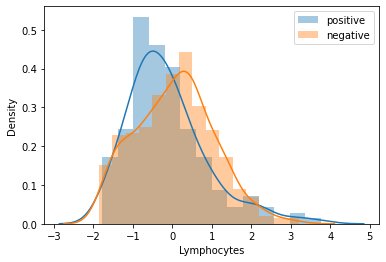

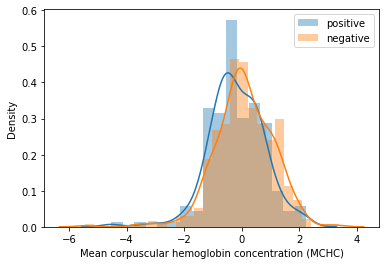

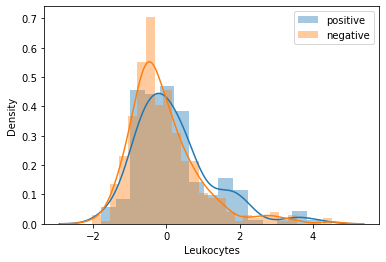

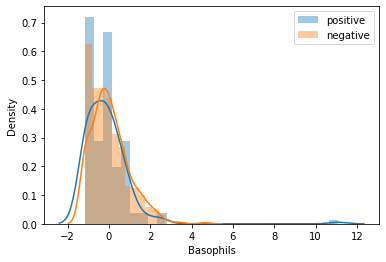

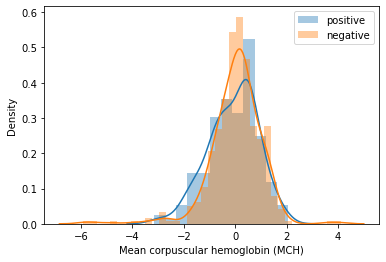

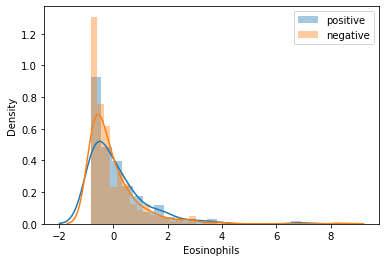

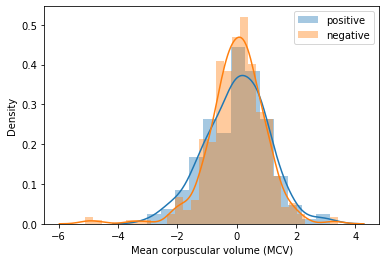

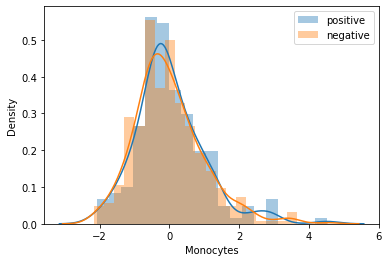

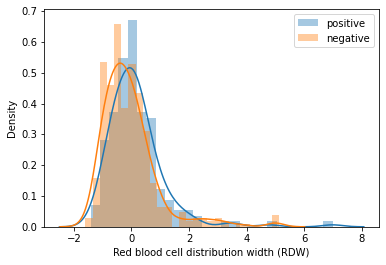

In [38]:
for col in blood_colomns :
    plt.figure()
    sns.distplot(malade_df[col], label='positive')
    sns.distplot(non_malade_df[col], label='negative')
    plt.legend()

In [39]:
def hospitalisation (df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']==1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [40]:
df['statut'] = df.apply(hospitalisation,axis =1)

In [41]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2           

C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\walid\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

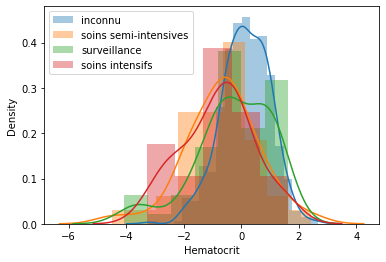

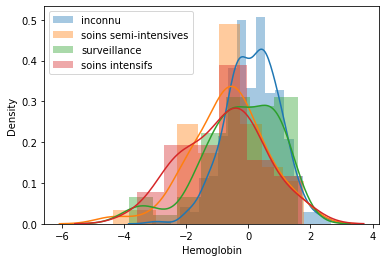

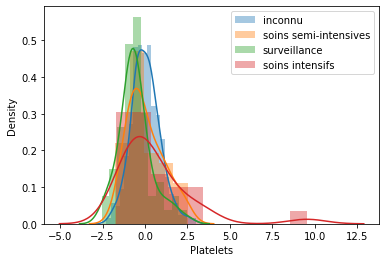

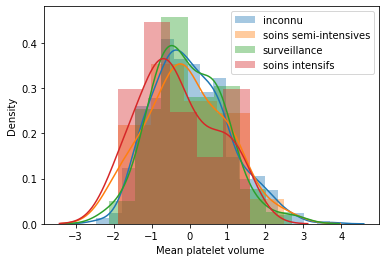

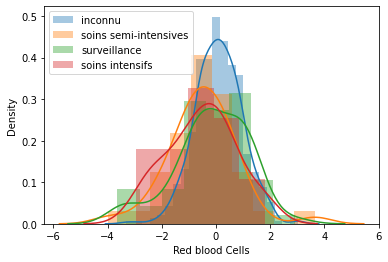

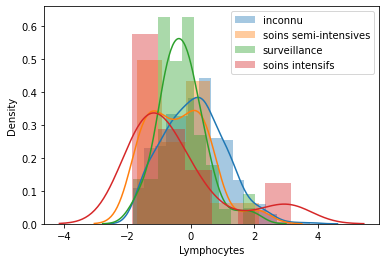

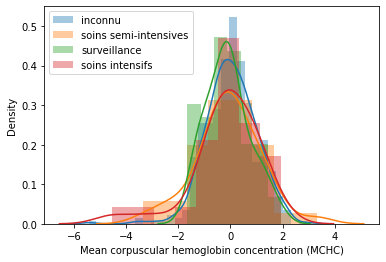

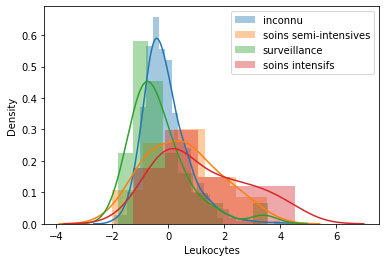

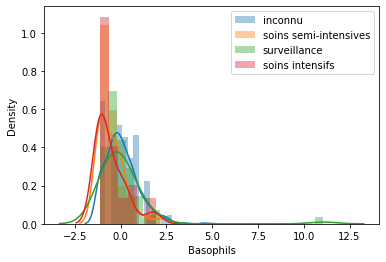

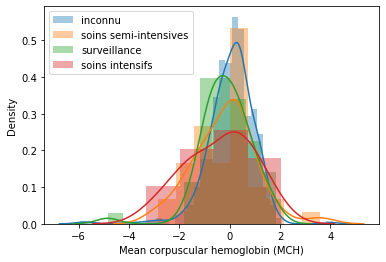

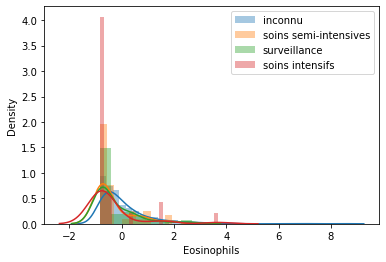

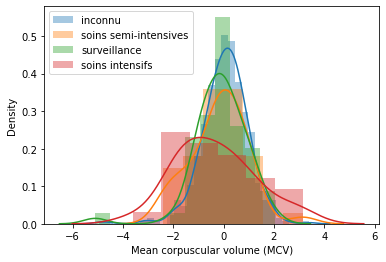

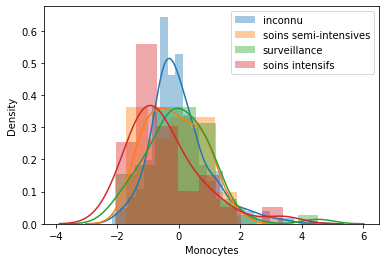

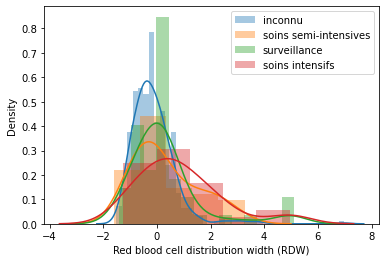

In [42]:
for col in blood_colomns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

In [43]:
df[blood_colomns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [44]:
df[viral_colomns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [45]:
df1 = df[viral_colomns[:-2]]
df1['covid19'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid19'].value_counts(normalize = True)

<ipython-input-45-7e5abc8338d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['covid19'] = df['SARS-Cov-2 exam result']


negative    0.91716
positive    0.08284
Name: covid19, dtype: float64

In [46]:
df2 = df[blood_colomns[:-2]]
df2['covid19'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid19'].value_counts(normalize = True)

<ipython-input-46-0565087cce54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['covid19'] = df['SARS-Cov-2 exam result']


negative    0.864775
positive    0.135225
Name: covid19, dtype: float64

### NaN analyse :
    Viral 1350 (92/8);
    Blood 600 (87/13);
    Both : 90

   ## ///////////////////////////////////////-----------------------------------------------------------------------------------
   # //////////////////////////////////----------------------------------------------------------------------
# Pre- Processing



In [47]:
df1= data.copy()
df1.shape

(5644, 111)

### Creation des sous ensembles (suite ADA)

In [48]:
missing_rate = df1.isna().sum()/df1.shape[0]

In [49]:
viral_colomns = list(df1.columns[(missing_rate <0.8) &( missing_rate  > 0.75)])
blood_colomns = list(df1.columns[(missing_rate <0.9) &( missing_rate  > 0.88)])

In [50]:
len(viral_colomns)

17

In [51]:
len(blood_colomns)

14

In [52]:
key_columns= ['Patient age quantile', 'SARS-Cov-2 exam result']

In [53]:
df1 = df1[key_columns+ blood_colomns +viral_colomns]
df1.head()

Patient age quantile SARS-Cov-2 exam result  Hematocrit  Hemoglobin  \
0                    13               negative         NaN         NaN   
1                    17               negative    0.236515    -0.02234   
2                     8               negative         NaN         NaN   
3                     5               negative         NaN         NaN   
4                    15               negative         NaN         NaN   

   Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0        NaN                    NaN              NaN          NaN   
1  -0.517413               0.010677         0.102004     0.318366   
2        NaN                    NaN              NaN          NaN   
3        NaN                    NaN              NaN          NaN   
4        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         

In [54]:
df1.shape

(5644, 33)

## Train / Test  - Nettoyage - encodage

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
trainset, testset = train_test_split(df1,test_size = 0.2,random_state = 7)

In [57]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4078
positive     437
Name: SARS-Cov-2 exam result, dtype: int64

In [58]:
trainset.shape

(4515, 33)

In [59]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1008
positive     121
Name: SARS-Cov-2 exam result, dtype: int64

## Encodage

In [60]:
def encodage(df):
    code = {
        'positive':1,
        'negative':0,
        'detected':1,
        'not_detected':0
    }
    for col in df1.select_dtypes('object'):
        df[col]=df[col].map(code)
    return df

In [61]:
viral_colomns2= viral_colomns

In [62]:
def feature_engineering(df):
    df['est malade'] = df[viral_colomns2].sum(axis=1)>= 1
    df.drop(viral_colomns2, axis=1)
    return df

In [63]:
def imputation(df):
    #df['is na'] =( df['Parainfluenza 1'].isna() | df['Lymphocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis =0)
    return df

In [64]:
def preprocessing(df):
    df=encodage(df)
    feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis=1)
    y = df['SARS-Cov-2 exam result']
    print(y.value_counts())
    
    return X, y

In [65]:
X_train , y_train = preprocessing(trainset)

0    253
1     40
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-60-c302c8dd8e17>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].map(code)
<ipython-input-62-7f6619e608bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade'] = df[viral_colomns2].sum(axis=1)>= 1


In [66]:
X_test , y_test = preprocessing(testset)

0    59
1    10
Name: SARS-Cov-2 exam result, dtype: int64


<ipython-input-60-c302c8dd8e17>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].map(code)
<ipython-input-62-7f6619e608bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade'] = df[viral_colomns2].sum(axis=1)>= 1


## Modellisation 

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier(random_state = 7)

## procedure d'evaluation

In [69]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [70]:
def evaluation(model):
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    N, train_score, val_score = learning_curve(model,X_train,y_train,
                                              cv=4, scoring='f1',
                                              train_sizes= np.linspace(0.1,1,10))
    plt.figure(figsize = (12,8))
    plt.plot(N, train_score.mean(axis=1),label = 'train score')
    plt.plot(N, val_score.mean(axis=1),label = 'validation score')
    plt.legend()

[[59  0]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        59
           1       1.00      0.30      0.46        10

    accuracy                           0.90        69
   macro avg       0.95      0.65      0.70        69
weighted avg       0.91      0.90      0.87        69



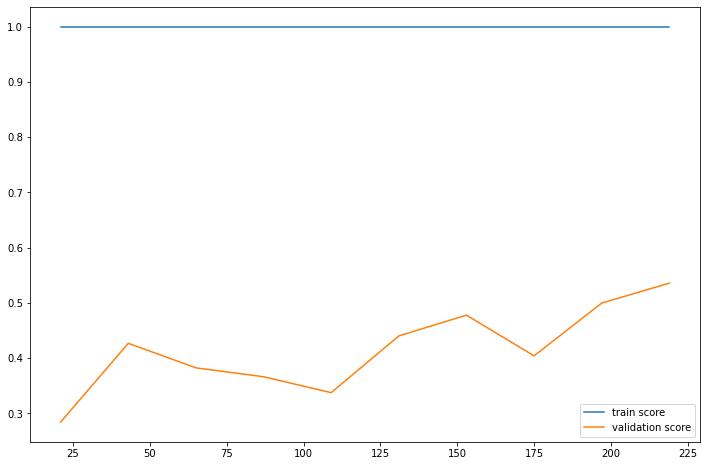

In [71]:
evaluation(model)

### Savoir les features qui sont importantes

<AxesSubplot:>

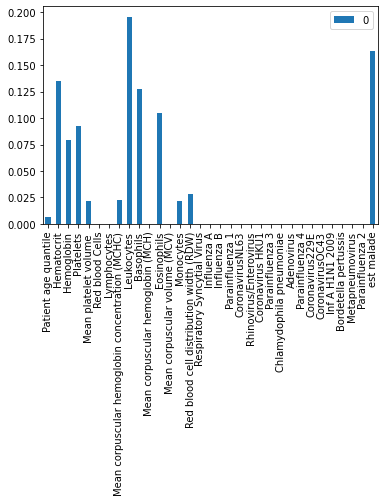

In [72]:
pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar()

# Remarque :

on remarque que apres meme supprimer les columns virals on se trouve tjrs dans le problemes du Overfiting 
## Donc on peut changer de model avec un autre qui lutte contre l'Overfitting et c' "RANDOMFOREST"

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
model2 = RandomForestClassifier(random_state=7)

[[59  0]
 [ 9  1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        59
           1       1.00      0.10      0.18        10

    accuracy                           0.87        69
   macro avg       0.93      0.55      0.56        69
weighted avg       0.89      0.87      0.82        69



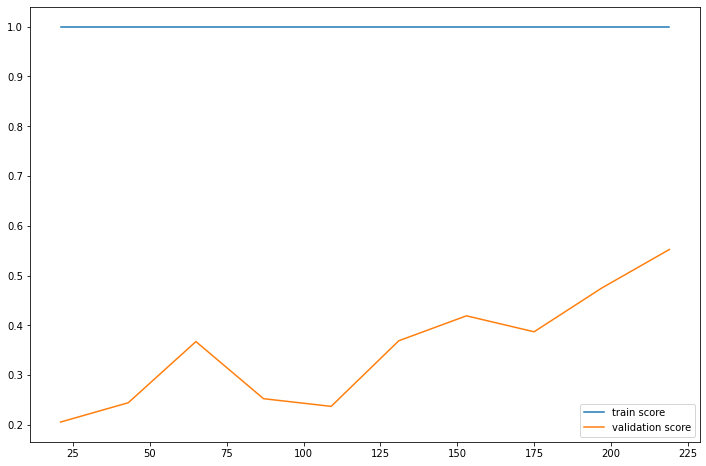

In [75]:
evaluation(model2)

<AxesSubplot:>

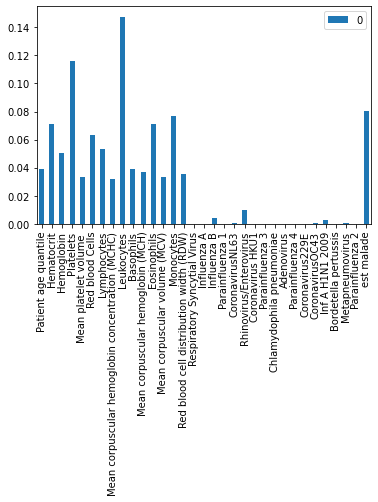

In [76]:
pd.DataFrame(model2.feature_importances_,index=X_train.columns).plot.bar()

# Remarque :

on remarque que apres meme changer de model on se trouve tjrs dans le problemes du Overfiting

## Donc on peut changer definir un seuil pour l 'importance de features on utilisant "SelectKBest" du sklearn.feature_selection

In [77]:
from sklearn.feature_selection import SelectKBest , f_classif
from sklearn.pipeline import make_pipeline

In [78]:
model3 = make_pipeline(SelectKBest(f_classif, k=10), # k=10 cvd on prond les 10 Best features d'apres le test de Anova "f_classif"
                      RandomForestClassifier(random_state=7))

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [18 23 25 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 19 21 22 23 24 25 27 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[59  0]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        59
           1       1.00      0.30      0.46        10

    accuracy                           0.90        69
   macro avg       0.95      0.65      0.70        69
weighted avg       0.91      0.90      0.87        69



C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 21 23 24 25 27 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 21 23 24 25 27 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [18 21 23 25 27 29 31] are constant.
  warnings.warn("Features %s 

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 22 23 24 25 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 23 24 25 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 23 24 25 29 31] are constant.
  warnings.warn("Features %s are constant

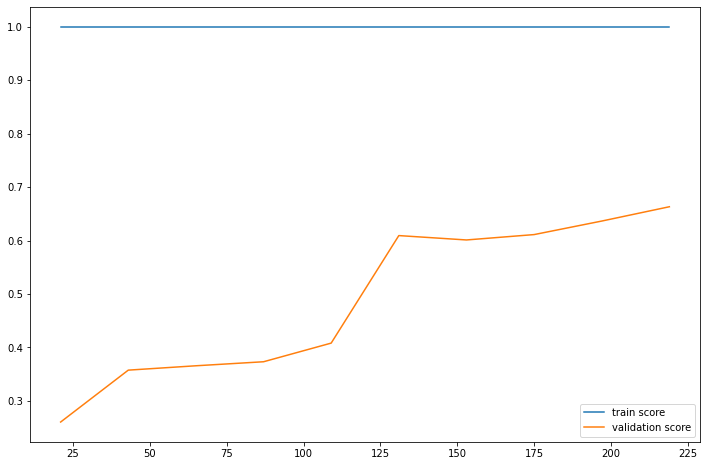

In [79]:
evaluation(model3)

## Remarque :
avec k=10 on a un progresse notamment a 225 simples on a une  precision de 67% 
### Donc on peut diminuer k et evaluer encore

In [80]:
model4 = make_pipeline(SelectKBest(f_classif, k=5), # k=5 cvd on prond les 5 Best features d'apres le test de Anova "f_classif"
                      RandomForestClassifier(random_state=7))

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [18 23 25 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 19 21 22 23 24 25 27 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[59  0]
 [ 8  2]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        59
           1       1.00      0.20      0.33        10

    accuracy                           0.88        69
   macro avg       0.94      0.60      0.63        69
weighted avg       0.90      0.88      0.85        69



C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 21 23 24 25 27 29 30 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 21 23 24 25 27 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [18 21 23 25 27 29 31] are constant.
  warnings.warn("Features %s 

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 22 23 24 25 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 23 24 25 29 31] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [16 18 23 24 25 29 31] are constant.
  warnings.warn("Features %s are constant

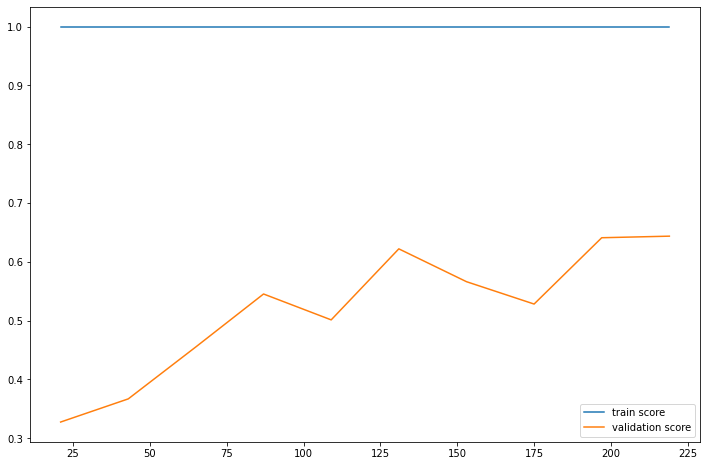

In [81]:
evaluation(model4)

## Remarque :
avec k=5 c'est toujours insuffisant 
### Donc on peut ajouter PolynomialFeatures suivi par un PCA

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

In [83]:
model5 = make_pipeline(PolynomialFeatures(2), # elever chaque variable au carre 
                       SelectKBest(f_classif, k=10), # k=10 cvd on prond les 10 Best features d'apres le test de Anova "f_classif"
                      RandomForestClassifier(random_state=7))

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0  19  24  26  30  32  52  57  58  59  63  65  84  89  91  95  97 115
 120 122 126 128 145 150 152 156 158 174 179 181 185 187 202 207 209 213
 215 229 234 236 240 242 255 260 262 266 268 280 285 287 291 293 304 309
 311 315 317 327 332 334 338 340 349 354 356 360 362 370 375 377 381 383
 390 395 397 401 403 409 414 416 420 422 425 426 427 428 430 431 432 434
 435 436 437 438 439 440 443 444 445 446 447 448 449 450 451 452 453 455
 456 457 460 461 463 464 465 466 467 468 469 471 473 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 489 491 492 494 495 496 497 498 499
 500 501 502 505 506 507 509 510 512 513 514 515 518 519 520 521 522 523
 525 526 527 530 531 532 533 534 535 536 537 538 540 541 542 543 544 545
 546 547 548 549 551 552 553 554 555 556 557 559 560 561 562 563 564 565
 566 568 569 570 571 572 575 576 577 578 581 582 583 585 586 587 588 590
 59

[[59  0]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        59
           1       1.00      0.30      0.46        10

    accuracy                           0.90        69
   macro avg       0.95      0.65      0.70        69
weighted avg       0.91      0.90      0.87        69



C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0  17  19  22  24  25  26  28  30  31  32  50  52  55  57  58  59  61
  63  64  65  82  84  87  89  90  91  93  95  96  97 113 115 118 120 121
 122 124 126 127 128 143 145 148 150 151 152 154 156 157 158 172 174 177
 179 180 181 183 185 186 187 200 202 205 207 208 209 211 213 214 215 227
 229 232 234 235 236 238 240 241 242 253 255 258 260 261 262 264 266 267
 268 278 280 283 285 286 287 289 291 292 293 302 304 307 309 310 311 313
 315 316 317 325 327 330 332 333 334 336 338 339 340 347 349 352 354 355
 356 358 360 361 362 368 370 373 375 376 377 379 381 382 383 388 390 393
 395 396 397 399 401 402 403 407 409 412 414 415 416 418 420 421 422 425
 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 458 460 461 463 464
 465 466 467 468 469 470 471 472 473 475 476 477 478 479 480 481 482 483
 48

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0  19  22  24  26  30  32  52  55  57  58  59  63  65  84  87  89  91
  95  97 115 118 120 122 126 128 145 148 150 152 156 158 174 177 179 181
 185 187 202 205 207 209 213 215 229 232 234 236 240 242 255 258 260 262
 266 268 280 283 285 287 291 293 304 307 309 311 315 317 327 330 332 334
 338 340 349 352 354 356 360 362 370 373 375 377 381 383 390 393 395 397
 401 403 409 412 414 416 420 422 425 426 427 428 430 431 432 434 435 436
 437 438 439 440 443 444 445 446 447 448 449 450 451 452 453 455 456 457
 460 461 463 464 465 466 467 468 469 471 473 475 476 477 478 479 480 481
 482 483 484 485 486 487 488 489 491 492 494 495 496 497 498 499 500 501
 502 505 506 507 509 510 512 513 514 515 517 518 519 520 521 522 523 524
 525 526 527 528 530 531 532 533 534 535 536 537 538 540 541 542 543 544
 545 546 547 548 549 551 552 553 554 555 556 557 559 560 561 562 563 564
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0  19  23  24  26  27  30  32  49  52  56  57  58  59  60  63  65  84
  88  89  91  92  95  97 115 119 120 122 123 126 128 145 149 150 152 153
 156 158 174 178 179 181 182 185 187 202 206 207 209 210 213 215 229 233
 234 236 237 240 242 255 259 260 262 263 266 268 280 284 285 287 288 291
 293 304 308 309 311 312 315 317 327 331 332 334 335 338 340 349 353 354
 356 357 360 362 370 374 375 377 378 381 383 390 394 395 397 398 401 403
 409 413 414 416 417 420 422 425 426 427 428 430 431 432 434 435 436 437
 438 439 440 443 444 445 446 447 448 449 450 451 452 453 455 456 457 460
 461 463 464 465 466 467 468 469 470 471 472 473 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 489 491 492 493 494 495 496 497 498 499
 500 501 502 505 506 507 509 510 511 512 513 514 515 518 519 520 521 522
 523 525 526 527 529 530 531 532 533 534 535 536 537 538 539 540 541 542
 54

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0  19  24  26  27  30  32  49  52  57  58  59  60  63  65  84  89  91
  92  95  97 115 120 122 123 126 128 145 150 152 153 156 158 174 179 181
 182 185 187 202 207 209 210 213 215 229 234 236 237 240 242 255 260 262
 263 266 268 280 285 287 288 291 293 304 309 311 312 315 317 327 332 334
 335 338 340 349 354 356 357 360 362 370 375 377 378 381 383 390 395 397
 398 401 403 409 414 416 417 420 422 425 426 427 428 430 431 432 434 435
 436 437 438 439 440 443 444 445 446 447 448 449 450 451 452 453 455 456
 457 460 461 463 464 465 466 467 468 469 470 471 473 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 489 491 492 493 494 495 496 497 498
 499 500 501 502 505 506 507 509 510 512 513 514 515 518 519 520 521 522
 523 525 526 527 530 531 532 533 534 535 536 537 538 540 541 542 543 544
 545 546 547 548 549 551 552 553 554 555 556 557 559 560 561 562 563 564
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0  17  19  24  25  26  30  32  50  52  57  58  59  63  65  82  84  89
  90  91  95  97 113 115 120 121 122 126 128 143 145 150 151 152 156 158
 172 174 179 180 181 185 187 200 202 207 208 209 213 215 227 229 234 235
 236 240 242 253 255 260 261 262 266 268 278 280 285 286 287 291 293 302
 304 309 310 311 315 317 325 327 332 333 334 338 340 347 349 354 355 356
 360 362 368 370 375 376 377 381 383 388 390 395 396 397 401 403 407 409
 414 415 416 420 422 425 426 427 428 429 430 431 432 433 434 435 436 437
 438 439 440 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456
 457 458 460 461 463 464 465 466 467 468 469 470 471 472 473 475 476 477
 478 479 480 481 482 483 484 485 486 487 488 489 491 492 494 495 496 497
 498 499 500 501 502 505 506 507 508 509 510 511 512 513 514 515 518 519
 520 521 522 523 525 526 527 530 531 532 533 534 535 536 537 538 540 541
 54

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0  17  19  23  24  25  26  27  28  30  32  49  50  52  56  57  58  59
  60  61  63  65  82  84  88  89  90  91  92  93  95  97 113 115 119 120
 121 122 123 124 126 128 143 145 149 150 151 152 153 154 156 158 172 174
 178 179 180 181 182 183 185 187 200 202 206 207 208 209 210 211 213 215
 227 229 233 234 235 236 237 238 240 242 253 255 259 260 261 262 263 264
 266 268 278 280 284 285 286 287 288 289 291 293 302 304 308 309 310 311
 312 313 315 317 325 327 331 332 333 334 335 336 338 340 347 349 353 354
 355 356 357 358 360 362 368 370 374 375 376 377 378 379 381 383 388 390
 394 395 396 397 398 399 401 403 407 409 413 414 415 416 417 418 420 422
 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 442 443
 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 460 461 463
 464 465 466 467 468 469 470 471 472 473 475 476 477 478 479 480 481 482
 48

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  0  19  24  26  30  32  52  57  58  59  63  65  84  89  91  95  97 115
 120 122 126 128 145 150 152 156 158 174 179 181 185 187 202 207 209 213
 215 229 234 236 240 242 255 260 262 266 268 280 285 287 291 293 304 309
 311 315 317 327 332 334 338 340 349 354 356 360 362 370 375 377 381 383
 390 395 397 401 403 409 414 416 420 422 425 426 427 428 430 431 432 434
 435 436 437 438 439 440 443 444 445 446 447 448 449 450 451 452 453 455
 456 457 460 461 463 464 465 466 467 468 469 471 472 473 475 476 477 478
 479 480 481 482 483 484 485 486 487 488 489 491 492 494 495 496 497 498
 499 500 501 502 505 506 507 509 510 511 512 513 514 515 518 519 520 521
 522 523 525 526 527 530 531 532 533 534 535 536 537 538 540 541 542 543
 544 545 546 547 548 549 551 552 553 554 555 556 557 559 560 561 562 563
 564 565 566 568 569 570 571 572 575 576 577 578 581 582 583 585 586 587
 58

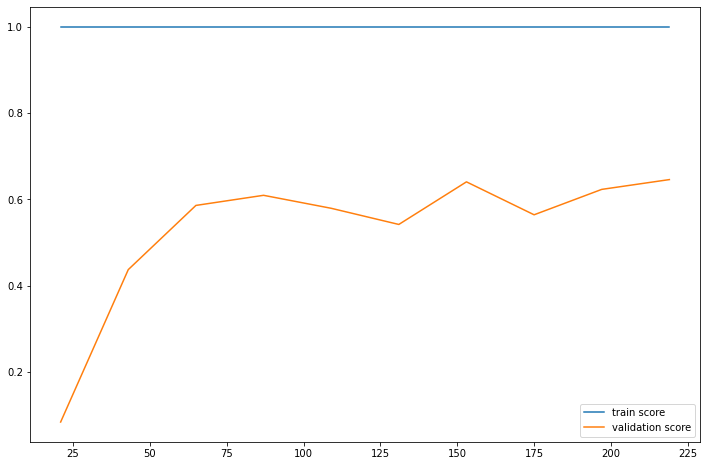

In [84]:
evaluation(model5)

## créer une liste de modeles pour les tester

In [85]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [86]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False),SelectKBest(f_classif, k=10))

In [87]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state = 7))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state = 7))
SVM = make_pipeline(preprocessor,StandardScaler(), SVC(random_state=7))
KNN =make_pipeline(preprocessor,StandardScaler(), KNeighborsClassifier())

In [88]:
list_of_models = {'RandomForest':RandomForest, 
                  'AdaBoost':AdaBoost,
                  'SVM':SVM,
                  'KNN':KNN
                 }

RandomForest
[[59  0]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        59
           1       1.00      0.30      0.46        10

    accuracy                           0.90        69
   macro avg       0.95      0.65      0.70        69
weighted avg       0.91      0.90      0.87        69



C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  51  56  57  58  62  64  83  88  90  94  96 114 119
 121 125 127 144 149 151 155 157 173 178 180 184 186 201 206 208 212 214
 228 233 235 239 241 254 259 261 265 267 279 284 286 290 292 303 308 310
 314 316 326 331 333 337 339 348 353 355 359 361 369 374 376 380 382 389
 394 396 400 402 408 413 415 419 421 424 425 426 427 429 430 431 433 434
 435 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455
 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499
 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522 524
 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544 545
 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564 565
 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587 589 591
 59

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  21  23  25  29  31  51  54  56  57  58  62  64  83  86  88  90  94
  96 114 117 119 121 125 127 144 147 149 151 155 157 173 176 178 180 184
 186 201 204 206 208 212 214 228 231 233 235 239 241 254 257 259 261 265
 267 279 282 284 286 290 292 303 306 308 310 314 316 326 329 331 333 337
 339 348 351 353 355 359 361 369 372 374 376 380 382 389 392 394 396 400
 402 408 411 413 415 419 421 424 425 426 427 429 430 431 433 434 435 436
 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455 456 459
 460 462 463 464 465 466 467 468 470 471 472 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499 500
 501 504 505 506 508 509 511 512 513 514 516 517 518 519 520 521 522 523
 524 525 526 527 529 530 531 532 533 534 535 536 537 539 540 541 542 543
 544 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  22  23  24  25  26  27  29  31  48  49  51  55  56  57  58  59
  60  62  64  81  83  87  88  89  90  91  92  94  96 112 114 118 119 120
 121 122 123 125 127 142 144 148 149 150 151 152 153 155 157 171 173 177
 178 179 180 181 182 184 186 199 201 205 206 207 208 209 210 212 214 226
 228 232 233 234 235 236 237 239 241 252 254 258 259 260 261 262 263 265
 267 277 279 283 284 285 286 287 288 290 292 301 303 307 308 309 310 311
 312 314 316 324 326 330 331 332 333 334 335 337 339 346 348 352 353 354
 355 356 357 359 361 367 369 373 374 375 376 377 378 380 382 387 389 393
 394 395 396 397 398 400 402 406 408 412 413 414 415 416 417 419 421 424
 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 441 442 443
 444 445 446 447 448 449 450 451 452 453 454 455 456 457 459 460 462 463
 464 465 466 467 468 469 470 471 472 474 475 476 477 478 479 480 481 482
 48

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  26  29  31  48  51  56  57  58  59  62  64  83  88  90  91
  94  96 114 119 121 122 125 127 144 149 151 152 155 157 173 178 180 181
 184 186 201 206 208 209 212 214 228 233 235 236 239 241 254 259 261 262
 265 267 279 284 286 287 290 292 303 308 310 311 314 316 326 331 333 334
 337 339 348 353 355 356 359 361 369 374 376 377 380 382 389 394 396 397
 400 402 408 413 415 416 419 421 424 425 426 427 429 430 431 433 434 435
 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455 456
 459 460 462 463 464 465 466 467 468 469 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 492 493 494 495 496 497 498
 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522
 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  22  23  24  25  29  31  48  49  51  55  56  57  58  62  64  81
  83  87  88  89  90  94  96 112 114 118 119 120 121 125 127 142 144 148
 149 150 151 155 157 171 173 177 178 179 180 184 186 199 201 205 206 207
 208 212 214 226 228 232 233 234 235 239 241 252 254 258 259 260 261 265
 267 277 279 283 284 285 286 290 292 301 303 307 308 309 310 314 316 324
 326 330 331 332 333 337 339 346 348 352 353 354 355 359 361 367 369 373
 374 375 376 380 382 387 389 393 394 395 396 400 402 406 408 412 413 414
 415 419 421 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457
 459 460 462 463 464 465 466 467 468 469 470 471 472 474 475 476 477 478
 479 480 481 482 483 484 485 486 487 488 490 491 492 493 494 495 496 497
 498 499 500 501 504 505 506 507 508 509 510 511 512 513 514 517 518 519
 52

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  24  25  29  31  51  56  57  58  62  64  83  88  89  90  94  96
 114 119 120 121 125 127 144 149 150 151 155 157 173 178 179 180 184 186
 201 206 207 208 212 214 228 233 234 235 239 241 254 259 260 261 265 267
 279 284 285 286 290 292 303 308 309 310 314 316 326 331 332 333 337 339
 348 353 354 355 359 361 369 374 375 376 380 382 389 394 395 396 400 402
 408 413 414 415 419 421 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 453 454 455
 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499
 500 501 504 505 506 507 508 509 510 511 512 513 514 517 518 519 520 521
 522 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543
 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  23  24  25  29  31  49  51  56  57  58  62  64  81  83  88  89
  90  94  96 112 114 119 120 121 125 127 142 144 149 150 151 155 157 171
 173 178 179 180 184 186 199 201 206 207 208 212 214 226 228 233 234 235
 239 241 252 254 259 260 261 265 267 277 279 284 285 286 290 292 301 303
 308 309 310 314 316 324 326 331 332 333 337 339 346 348 353 354 355 359
 361 367 369 374 375 376 380 382 387 389 394 395 396 400 402 406 408 413
 414 415 419 421 424 425 426 427 428 429 430 431 432 433 434 435 436 437
 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456
 457 459 460 462 463 464 465 466 467 468 469 470 471 472 474 475 476 477
 478 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497
 498 499 500 501 504 505 506 507 508 509 510 511 512 513 514 517 518 519
 520 521 522 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541
 54

AdaBoost
[[59  0]
 [ 9  1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        59
           1       1.00      0.10      0.18        10

    accuracy                           0.87        69
   macro avg       0.93      0.55      0.56        69
weighted avg       0.89      0.87      0.82        69



C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  51  56  57  58  62  64  83  88  90  94  96 114 119
 121 125 127 144 149 151 155 157 173 178 180 184 186 201 206 208 212 214
 228 233 235 239 241 254 259 261 265 267 279 284 286 290 292 303 308 310
 314 316 326 331 333 337 339 348 353 355 359 361 369 374 376 380 382 389
 394 396 400 402 408 413 415 419 421 424 425 426 427 429 430 431 433 434
 435 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455
 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499
 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522 524
 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544 545
 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564 565
 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587 589 591
 59

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  21  23  25  29  31  51  54  56  57  58  62  64  83  86  88  90  94
  96 114 117 119 121 125 127 144 147 149 151 155 157 173 176 178 180 184
 186 201 204 206 208 212 214 228 231 233 235 239 241 254 257 259 261 265
 267 279 282 284 286 290 292 303 306 308 310 314 316 326 329 331 333 337
 339 348 351 353 355 359 361 369 372 374 376 380 382 389 392 394 396 400
 402 408 411 413 415 419 421 424 425 426 427 429 430 431 433 434 435 436
 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455 456 459
 460 462 463 464 465 466 467 468 470 471 472 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499 500
 501 504 505 506 508 509 511 512 513 514 516 517 518 519 520 521 522 523
 524 525 526 527 529 530 531 532 533 534 535 536 537 539 540 541 542 543
 544 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  22  23  25  26  29  31  48  51  55  56  57  58  59  62  64  83  87
  88  90  91  94  96 114 118 119 121 122 125 127 144 148 149 151 152 155
 157 173 177 178 180 181 184 186 201 205 206 208 209 212 214 228 232 233
 235 236 239 241 254 258 259 261 262 265 267 279 283 284 286 287 290 292
 303 307 308 310 311 314 316 326 330 331 333 334 337 339 348 352 353 355
 356 359 361 369 373 374 376 377 380 382 389 393 394 396 397 400 402 408
 412 413 415 416 419 421 424 425 426 427 429 430 431 433 434 435 436 437
 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455 456 459 460
 462 463 464 465 466 467 468 469 470 471 472 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 490 491 492 493 494 495 496 497 498 499
 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522 524
 525 526 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543
 54

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 15  16  18  22  23  24  25  26  27  29  31  48  49  51  55  56  57  58
  59  60  62  64  80  81  83  87  88  89  90  91  92  94  96 111 112 114
 118 119 120 121 122 123 125 127 141 142 144 148 149 150 151 152 153 155
 157 170 171 173 177 178 179 180 181 182 184 186 198 199 201 205 206 207
 208 209 210 212 214 225 226 228 232 233 234 235 236 237 239 241 251 252
 254 258 259 260 261 262 263 265 267 276 277 279 283 284 285 286 287 288
 290 292 300 301 303 307 308 309 310 311 312 314 316 323 324 326 330 331
 332 333 334 335 337 339 345 346 348 352 353 354 355 356 357 359 361 366
 367 369 373 374 375 376 377 378 380 382 386 387 389 393 394 395 396 397
 398 400 402 405 406 408 412 413 414 415 416 417 419 421 423 424 425 426
 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463
 46

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  23  24  25  29  31  49  51  56  57  58  62  64  81  83  88  89
  90  94  96 112 114 119 120 121 125 127 142 144 149 150 151 155 157 171
 173 178 179 180 184 186 199 201 206 207 208 212 214 226 228 233 234 235
 239 241 252 254 259 260 261 265 267 277 279 284 285 286 290 292 301 303
 308 309 310 314 316 324 326 331 332 333 337 339 346 348 353 354 355 359
 361 367 369 374 375 376 380 382 387 389 394 395 396 400 402 406 408 413
 414 415 419 421 424 425 426 427 428 429 430 431 432 433 434 435 436 437
 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456
 457 459 460 462 463 464 465 466 467 468 470 471 472 474 475 476 477 478
 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498
 499 500 501 504 505 506 507 508 509 510 511 512 513 514 517 518 519 520
 521 522 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542
 54

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  22  23  24  25  26  29  31  48  49  51  55  56  57  58  59  62
  64  81  83  87  88  89  90  91  94  96 112 114 118 119 120 121 122 125
 127 142 144 148 149 150 151 152 155 157 171 173 177 178 179 180 181 184
 186 199 201 205 206 207 208 209 212 214 226 228 232 233 234 235 236 239
 241 252 254 258 259 260 261 262 265 267 277 279 283 284 285 286 287 290
 292 301 303 307 308 309 310 311 314 316 324 326 330 331 332 333 334 337
 339 346 348 352 353 354 355 356 359 361 367 369 373 374 375 376 377 380
 382 387 389 393 394 395 396 397 400 402 406 408 412 413 414 415 416 419
 421 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 441
 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 459 460
 462 463 464 465 466 467 468 469 470 471 472 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 490 491 492 493 494 495 496 497 498 499
 50

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  51  56  57  58  62  64  83  88  90  94  96 114 119
 121 125 127 144 149 151 155 157 173 178 180 184 186 201 206 208 212 214
 228 233 235 239 241 254 259 261 265 267 279 284 286 290 292 303 308 310
 314 316 326 331 333 337 339 348 353 355 359 361 369 374 376 380 382 389
 394 396 400 402 408 413 415 419 421 424 425 426 427 429 430 431 433 434
 435 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455
 456 459 460 462 463 464 465 466 467 468 470 471 472 474 475 476 477 478
 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498
 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522
 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 565 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587 589
 59

SVM
[[59  0]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        59
           1       1.00      0.30      0.46        10

    accuracy                           0.90        69
   macro avg       0.95      0.65      0.70        69
weighted avg       0.91      0.90      0.87        69



C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  51  56  57  58  62  64  83  88  90  94  96 114 119
 121 125 127 144 149 151 155 157 173 178 180 184 186 201 206 208 212 214
 228 233 235 239 241 254 259 261 265 267 279 284 286 290 292 303 308 310
 314 316 326 331 333 337 339 348 353 355 359 361 369 374 376 380 382 389
 394 396 400 402 408 413 415 419 421 424 425 426 427 429 430 431 433 434
 435 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455
 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499
 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522 524
 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544 545
 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564 565
 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587 589 591
 59

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 15  16  18  22  23  24  25  26  27  29  31  48  49  51  55  56  57  58
  59  60  62  64  80  81  83  87  88  89  90  91  92  94  96 111 112 114
 118 119 120 121 122 123 125 127 141 142 144 148 149 150 151 152 153 155
 157 170 171 173 177 178 179 180 181 182 184 186 198 199 201 205 206 207
 208 209 210 212 214 225 226 228 232 233 234 235 236 237 239 241 251 252
 254 258 259 260 261 262 263 265 267 276 277 279 283 284 285 286 287 288
 290 292 300 301 303 307 308 309 310 311 312 314 316 323 324 326 330 331
 332 333 334 335 337 339 345 346 348 352 353 354 355 356 357 359 361 366
 367 369 373 374 375 376 377 378 380 382 386 387 389 393 394 395 396 397
 398 400 402 405 406 408 412 413 414 415 416 417 419 421 423 424 425 426
 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463
 46

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  22  23  24  25  26  29  31  48  49  51  55  56  57  58  59  62
  64  81  83  87  88  89  90  91  94  96 112 114 118 119 120 121 122 125
 127 142 144 148 149 150 151 152 155 157 171 173 177 178 179 180 181 184
 186 199 201 205 206 207 208 209 212 214 226 228 232 233 234 235 236 239
 241 252 254 258 259 260 261 262 265 267 277 279 283 284 285 286 287 290
 292 301 303 307 308 309 310 311 314 316 324 326 330 331 332 333 334 337
 339 346 348 352 353 354 355 356 359 361 367 369 373 374 375 376 377 380
 382 387 389 393 394 395 396 397 400 402 406 408 412 413 414 415 416 419
 421 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 441
 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 459 460
 462 463 464 465 466 467 468 469 470 471 472 474 475 476 477 478 479 480
 481 482 483 484 485 486 487 488 490 491 492 493 494 495 496 497 498 499
 50

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  22  23  24  25  29  31  48  49  51  55  56  57  58  62  64  81
  83  87  88  89  90  94  96 112 114 118 119 120 121 125 127 142 144 148
 149 150 151 155 157 171 173 177 178 179 180 184 186 199 201 205 206 207
 208 212 214 226 228 232 233 234 235 239 241 252 254 258 259 260 261 265
 267 277 279 283 284 285 286 290 292 301 303 307 308 309 310 314 316 324
 326 330 331 332 333 337 339 346 348 352 353 354 355 359 361 367 369 373
 374 375 376 380 382 387 389 393 394 395 396 400 402 406 408 412 413 414
 415 419 421 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457
 459 460 462 463 464 465 466 467 468 469 470 471 472 474 475 476 477 478
 479 480 481 482 483 484 485 486 487 488 490 491 492 493 494 495 496 497
 498 499 500 501 504 505 506 507 508 509 510 511 512 513 514 517 518 519
 52

KNN
[[58  1]
 [ 8  2]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        59
           1       0.67      0.20      0.31        10

    accuracy                           0.87        69
   macro avg       0.77      0.59      0.62        69
weighted avg       0.85      0.87      0.84        69



C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  21  23  24  25  27  29  31  49  51  54  56  57  58  60  62  64
  81  83  86  88  89  90  92  94  96 112 114 117 119 120 121 123 125 127
 142 144 147 149 150 151 153 155 157 171 173 176 178 179 180 182 184 186
 199 201 204 206 207 208 210 212 214 226 228 231 233 234 235 237 239 241
 252 254 257 259 260 261 263 265 267 277 279 282 284 285 286 288 290 292
 301 303 306 308 309 310 312 314 316 324 326 329 331 332 333 335 337 339
 346 348 351 353 354 355 357 359 361 367 369 372 374 375 376 378 380 382
 387 389 392 394 395 396 398 400 402 406 408 411 413 414 415 417 419 421
 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 441 442
 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 459 460 462
 463 464 465 466 467 468 470 471 472 474 475 476 477 478 479 480 481 482
 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499 500 501 504
 50

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 15  16  18  22  23  24  25  26  27  29  31  48  49  51  55  56  57  58
  59  60  62  64  80  81  83  87  88  89  90  91  92  94  96 111 112 114
 118 119 120 121 122 123 125 127 141 142 144 148 149 150 151 152 153 155
 157 170 171 173 177 178 179 180 181 182 184 186 198 199 201 205 206 207
 208 209 210 212 214 225 226 228 232 233 234 235 236 237 239 241 251 252
 254 258 259 260 261 262 263 265 267 276 277 279 283 284 285 286 287 288
 290 292 300 301 303 307 308 309 310 311 312 314 316 323 324 326 330 331
 332 333 334 335 337 339 345 346 348 352 353 354 355 356 357 359 361 366
 367 369 373 374 375 376 377 378 380 382 386 387 389 393 394 395 396 397
 398 400 402 405 406 408 412 413 414 415 416 417 419 421 423 424 425 426
 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444
 445 446 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463
 46

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  26  29  31  48  51  56  57  58  59  62  64  83  88  90  91
  94  96 114 119 121 122 125 127 144 149 151 152 155 157 173 178 180 181
 184 186 201 206 208 209 212 214 228 233 235 236 239 241 254 259 261 262
 265 267 279 284 286 287 290 292 303 308 310 311 314 316 326 331 333 334
 337 339 348 353 355 356 359 361 369 374 376 377 380 382 389 394 396 397
 400 402 408 413 415 416 419 421 424 425 426 427 429 430 431 433 434 435
 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455 456
 459 460 462 463 464 465 466 467 468 469 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 492 493 494 495 496 497 498
 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522
 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  23  24  25  29  31  49  51  56  57  58  62  64  81  83  88  89
  90  94  96 112 114 119 120 121 125 127 142 144 149 150 151 155 157 171
 173 178 179 180 184 186 199 201 206 207 208 212 214 226 228 233 234 235
 239 241 252 254 259 260 261 265 267 277 279 284 285 286 290 292 301 303
 308 309 310 314 316 324 326 331 332 333 337 339 346 348 353 354 355 359
 361 367 369 374 375 376 380 382 387 389 394 395 396 400 402 406 408 413
 414 415 419 421 424 425 426 427 428 429 430 431 432 433 434 435 436 437
 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456
 457 459 460 462 463 464 465 466 467 468 470 471 472 474 475 476 477 478
 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498
 499 500 501 504 505 506 507 508 509 510 511 512 513 514 517 518 519 520
 521 522 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542
 54

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  18  23  24  25  29  31  49  51  56  57  58  62  64  81  83  88  89
  90  94  96 112 114 119 120 121 125 127 142 144 149 150 151 155 157 171
 173 178 179 180 184 186 199 201 206 207 208 212 214 226 228 233 234 235
 239 241 252 254 259 260 261 265 267 277 279 284 285 286 290 292 301 303
 308 309 310 314 316 324 326 331 332 333 337 339 346 348 353 354 355 359
 361 367 369 374 375 376 380 382 387 389 394 395 396 400 402 406 408 413
 414 415 419 421 424 425 426 427 428 429 430 431 432 433 434 435 436 437
 438 439 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456
 457 459 460 462 463 464 465 466 467 468 469 470 471 472 474 475 476 477
 478 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497
 498 499 500 501 504 505 506 507 508 509 510 511 512 513 514 517 518 519
 520 521 522 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541
 54

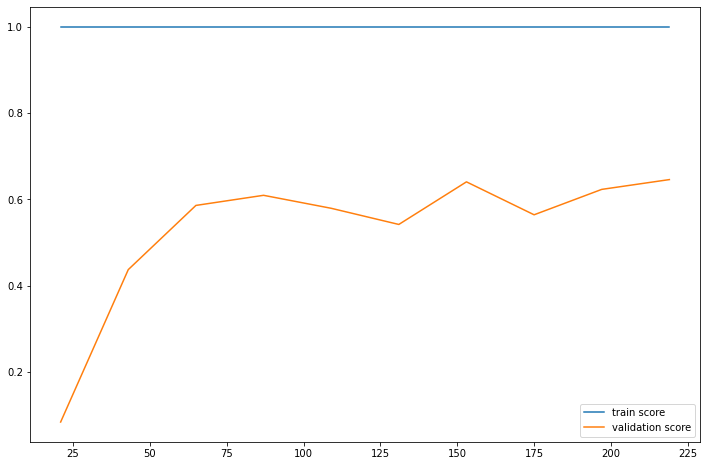

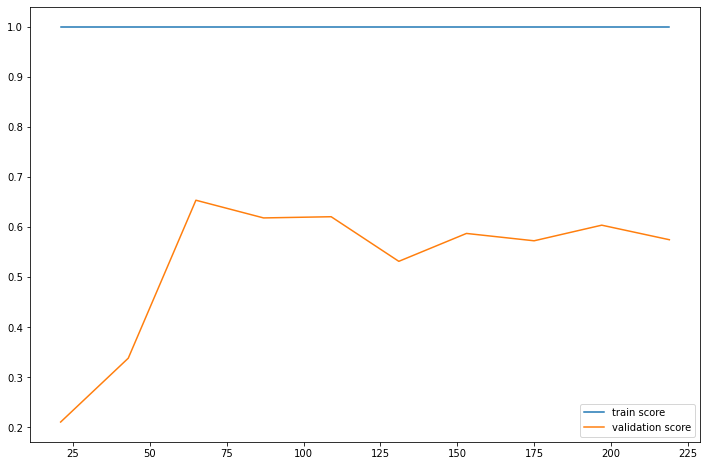

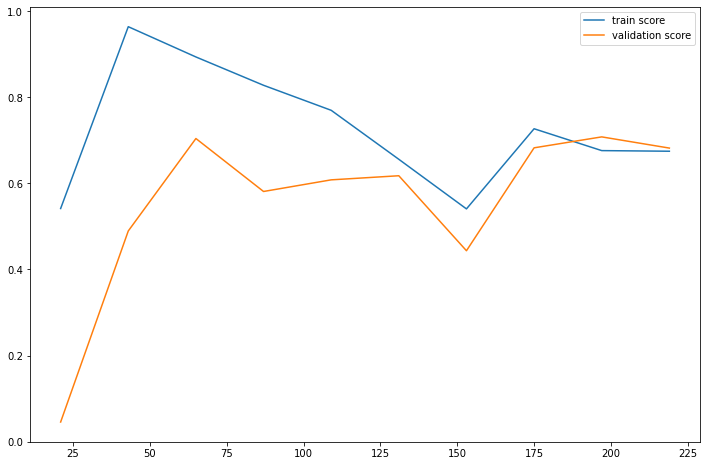

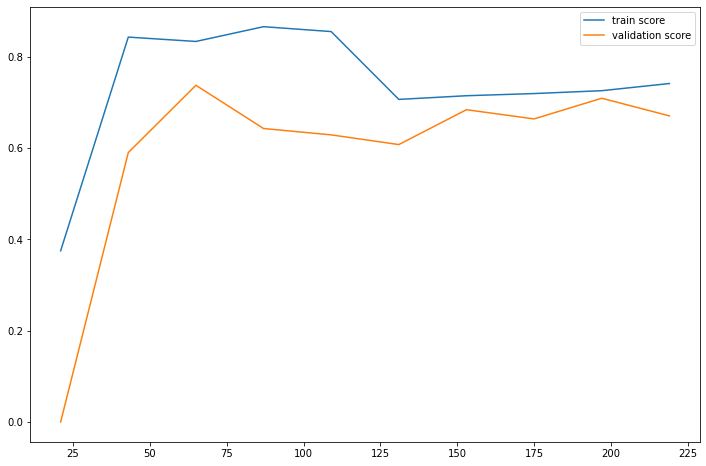

In [89]:
for name ,model in list_of_models.items():
    print (name)
    evaluation(model)


# Remarque :
On remarque que le SVM et le KNN n'ont pas dans l' overfitting (trainset =! 1)
choisisant par exemple le SVM pour l'optimisation



## Apres avoir evalué notre Liste de modeles on passe maintenant a optimiser nos modeles

# OPTIMISATION

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=7))])

In [92]:
hyper_params = {'svc__gamma':[1e-3, 1e-4], # on ajoute les 'svc__' pour que la grid se derige vers l'etape svc du pipeline
                 'svc__C':[1,10,100,1000]}

In [93]:
grid = GridSearchCV(SVM,hyper_params, scoring='recall', cv=4)

#train the grid
grid.fit(X_train,y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  21  23  25  29  31  51  54  56  57  58  62  64  83  86  88  90  94
  96 114 117 119 121 125 127 144 147 149 151 155 157 173 176 178 180 184
 186 201 204 206 208 212 214 228 231 233 235 239 241 254 257 259 261 265
 267 279 282 284 286 290 292 303 306 308 310 314 316 326 329 331 333 337
 339 348 351 353 355 359 361 369 372 374 376 380 382 389 392 394 396 400
 402 408 411 413 415 419 421 424 425 426 427 429 430 431 433 434 435 436
 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455 456 459
 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479 480 481
 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499 500 501
 504 505 506 508 509 511 512 513 514 516 517 518 519 520 521 522 523 524
 525 526 527 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  24  25  29  31  51  56  57  58  62  64  83  88  89  90  94  96
 114 119 120 121 125 127 144 149 150 151 155 157 173 178 179 180 184 186
 201 206 207 208 212 214 228 233 234 235 239 241 254 259 260 261 265 267
 279 284 285 286 290 292 303 308 309 310 314 316 326 331 332 333 337 339
 348 353 354 355 359 361 369 374 375 376 380 382 389 394 395 396 400 402
 408 413 414 415 419 421 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 453 454 455
 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499
 500 501 504 505 506 507 508 509 510 511 512 513 514 517 518 519 520 521
 522 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543
 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  26  29  31  48  51  56  57  58  59  62  64  83  88  90  91
  94  96 114 119 121 122 125 127 144 149 151 152 155 157 173 178 180 181
 184 186 201 206 208 209 212 214 228 233 235 236 239 241 254 259 261 262
 265 267 279 284 286 287 290 292 303 308 310 311 314 316 326 331 333 334
 337 339 348 353 355 356 359 361 369 374 376 377 380 382 389 394 396 397
 400 402 408 413 415 416 419 421 424 425 426 427 429 430 431 433 434 435
 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455 456
 459 460 462 463 464 465 466 467 468 469 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 492 493 494 495 496 497 498
 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522
 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 56

{'svc__C': 1000, 'svc__gamma': 0.001}
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        59
           1       1.00      0.30      0.46        10

    accuracy                           0.90        69
   macro avg       0.95      0.65      0.70        69
weighted avg       0.91      0.90      0.87        69



C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  51  56  57  58  62  64  83  88  90  94  96 114 119
 121 125 127 144 149 151 155 157 173 178 180 184 186 201 206 208 212 214
 228 233 235 239 241 254 259 261 265 267 279 284 286 290 292 303 308 310
 314 316 326 331 333 337 339 348 353 355 359 361 369 374 376 380 382 389
 394 396 400 402 408 413 415 419 421 424 425 426 427 429 430 431 433 434
 435 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455
 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499
 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522 524
 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544 545
 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564 565
 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587 589 591
 59

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  51  56  57  58  62  64  83  88  90  94  96 114 119
 121 125 127 144 149 151 155 157 173 178 180 184 186 201 206 208 212 214
 228 233 235 239 241 254 259 261 265 267 279 284 286 290 292 303 308 310
 314 316 326 331 333 337 339 348 353 355 359 361 369 374 376 380 382 389
 394 396 400 402 408 413 415 419 421 424 425 426 427 429 430 431 433 434
 435 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455
 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499
 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522 524
 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544 545
 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564 565
 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587 589 591
 59

[[59  0]
 [ 7  3]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        59
           1       1.00      0.30      0.46        10

    accuracy                           0.90        69
   macro avg       0.95      0.65      0.70        69
weighted avg       0.91      0.90      0.87        69



C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  21  23  25  29  31  51  54  56  57  58  62  64  83  86  88  90  94
  96 114 117 119 121 125 127 144 147 149 151 155 157 173 176 178 180 184
 186 201 204 206 208 212 214 228 231 233 235 239 241 254 257 259 261 265
 267 279 282 284 286 290 292 303 306 308 310 314 316 326 329 331 333 337
 339 348 351 353 355 359 361 369 372 374 376 380 382 389 392 394 396 400
 402 408 411 413 415 419 421 424 425 426 427 429 430 431 433 434 435 436
 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455 456 459
 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479 480 481
 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499 500 501
 504 505 506 508 509 511 512 513 514 516 517 518 519 520 521 522 523 524
 525 526 527 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  26  29  31  48  51  56  57  58  59  62  64  83  88  90  91
  94  96 114 119 121 122 125 127 144 149 151 152 155 157 173 178 180 181
 184 186 201 206 208 209 212 214 228 233 235 236 239 241 254 259 261 262
 265 267 279 284 286 287 290 292 303 308 310 311 314 316 326 331 333 334
 337 339 348 353 355 356 359 361 369 374 376 377 380 382 389 394 396 397
 400 402 408 413 415 416 419 421 424 425 426 427 429 430 431 433 434 435
 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455 456
 459 460 462 463 464 465 466 467 468 469 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 492 493 494 495 496 497 498
 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522
 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  24  25  29  31  51  56  57  58  62  64  83  88  89  90  94  96
 114 119 120 121 125 127 144 149 150 151 155 157 173 178 179 180 184 186
 201 206 207 208 212 214 228 233 234 235 239 241 254 259 260 261 265 267
 279 284 285 286 290 292 303 308 309 310 314 316 326 331 332 333 337 339
 348 353 354 355 359 361 369 374 375 376 380 382 389 394 395 396 400 402
 408 413 414 415 419 421 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 453 454 455
 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499
 500 501 504 505 506 507 508 509 510 511 512 513 514 517 518 519 520 521
 522 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543
 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  51  56  57  58  62  64  83  88  90  94  96 114 119
 121 125 127 144 149 151 155 157 173 178 180 184 186 201 206 208 212 214
 228 233 235 239 241 254 259 261 265 267 279 284 286 290 292 303 308 310
 314 316 326 331 333 337 339 348 353 355 359 361 369 374 376 380 382 389
 394 396 400 402 408 413 415 419 421 424 425 426 427 429 430 431 433 434
 435 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455
 456 459 460 462 463 464 465 466 467 468 470 471 472 474 475 476 477 478
 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498
 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522
 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 565 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587 589
 59

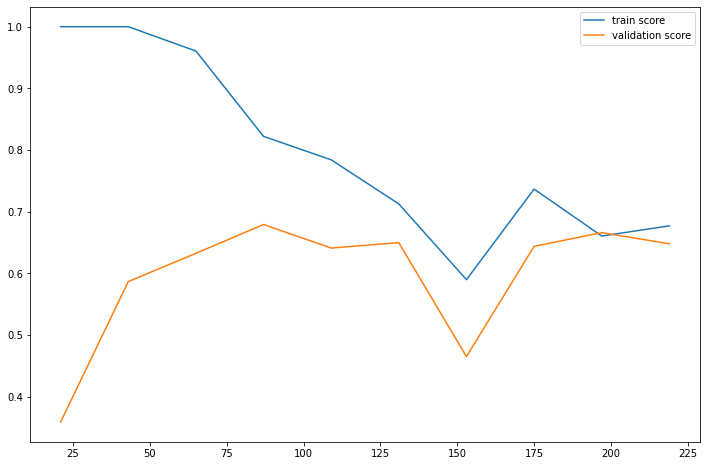

In [94]:
evaluation(grid.best_estimator_)

# Remarque :
même si apres un premier essai d'optimiser le modele. le resultat reste insuffisant car il y a plusieurs paramateres a modifier
## Donc on peut essayer de travailler avec RandomzedSearchCV

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
hyper_params2 = {'svc__gamma':[1e-3, 1e-4], # on ajoute les 'svc__' pour que la grid se derige vers l'etape svc du pipeline
                 'svc__C':[1,10,100,1000],
                 'pipeline__polynomialfeatures__degree':[2,3,4],
                 'pipeline__selectkbest__k': range(30,60)}

In [97]:
grid2 = RandomizedSearchCV(SVM,hyper_params2, scoring='recall',
                           cv=4, n_iter=40)

#train the grid
grid2.fit(X_train,y_train)

print(grid2.best_params_)

y_pred = grid2.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   21   23 ... 7135 7136 7137] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   23   25 ... 7135 7136 7137] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   23   24 ... 7135 7136 7137] are constant.
  war

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   18    21    23 ... 66040 66041 66042] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   18    23    25 ... 66040 66041 66042] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   18    23    24 ... 66040 66041 66042] a

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   18    21    23 ... 66040 66041 66042] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   18    23    25 ... 66040 66041 66042] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   18    23    24 ... 66040 66041 66042] a

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   18    21    23 ... 66040 66041 66042] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   18    23    25 ... 66040 66041 66042] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   18    23    24 ... 66040 66041 66042] a

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   23   24 ... 7135 7136 7137] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   23   25 ... 7135 7136 7137] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  21  23  25  29  31  51  54  56  57  58  62  64  8

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  21  23  25  29  31  51  54  56  57  58  62  64  83  86  88  90  94
  96 114 117 119 121 125 127 144 147 149 151 155 157 173 176 178 180 184
 186 201 204 206 208 212 214 228 231 233 235 239 241 254 257 259 261 265
 267 279 282 284 286 290 292 303 306 308 310 314 316 326 329 331 333 337
 339 348 351 353 355 359 361 369 372 374 376 380 382 389 392 394 396 400
 402 408 411 413 415 419 421 424 425 426 427 429 430 431 433 434 435 436
 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455 456 459
 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479 480 481
 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499 500 501
 504 505 506 508 509 511 512 513 514 516 517 518 519 520 521 522 523 524
 525 526 527 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 56

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   23   25 ... 7135 7136 7137] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   23   24 ... 7135 7136 7137] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   23   25 ... 7135 7136 7137] are constant.
  war

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   23   25 ... 7135 7136 7137] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   23   24 ... 7135 7136 7137] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [  18   23   25 ... 7135 7136 7137] are constant.
  war

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  51  56  57  58  62  64  83  88  90  94  96 114 119
 121 125 127 144 149 151 155 157 173 178 180 184 186 201 206 208 212 214
 228 233 235 239 241 254 259 261 265 267 279 284 286 290 292 303 308 310
 314 316 326 331 333 337 339 348 353 355 359 361 369 374 376 380 382 389
 394 396 400 402 408 413 415 419 421 424 425 426 427 429 430 431 433 434
 435 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455
 456 459 460 462 463 464 465 466 467 468 470 471 472 474 475 476 477 478
 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498
 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522
 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 565 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587 589
 59

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  25  29  31  51  56  57  58  62  64  83  88  90  94  96 114 119
 121 125 127 144 149 151 155 157 173 178 180 184 186 201 206 208 212 214
 228 233 235 239 241 254 259 261 265 267 279 284 286 290 292 303 308 310
 314 316 326 331 333 337 339 348 353 355 359 361 369 374 376 380 382 389
 394 396 400 402 408 413 415 419 421 424 425 426 427 429 430 431 433 434
 435 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 454 455
 456 459 460 462 463 464 465 466 467 468 470 471 472 474 475 476 477 478
 479 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498
 499 500 501 504 505 506 508 509 511 512 513 514 517 518 519 520 521 522
 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543 544
 545 546 547 548 550 551 552 553 554 555 556 558 559 560 561 562 563 564
 565 567 568 569 570 571 574 575 576 577 580 581 582 584 585 586 587 589
 59

C:\Users\walid\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 18  23  24  25  29  31  51  56  57  58  62  64  83  88  89  90  94  96
 114 119 120 121 125 127 144 149 150 151 155 157 173 178 179 180 184 186
 201 206 207 208 212 214 228 233 234 235 239 241 254 259 260 261 265 267
 279 284 285 286 290 292 303 308 309 310 314 316 326 331 332 333 337 339
 348 353 354 355 359 361 369 374 375 376 380 382 389 394 395 396 400 402
 408 413 414 415 419 421 424 425 426 427 428 429 430 431 432 433 434 435
 436 437 438 439 442 443 444 445 446 447 448 449 450 451 452 453 454 455
 456 459 460 462 463 464 465 466 467 468 470 472 474 475 476 477 478 479
 480 481 482 483 484 485 486 487 488 490 491 493 494 495 496 497 498 499
 500 501 504 505 506 507 508 509 510 511 512 513 514 517 518 519 520 521
 522 524 525 526 529 530 531 532 533 534 535 536 537 539 540 541 542 543
 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561
 56

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 34, 'pipeline__polynomialfeatures__degree': 4}
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        59
           1       0.80      0.40      0.53        10

    accuracy                           0.90        69
   macro avg       0.85      0.69      0.74        69
weighted avg       0.89      0.90      0.88        69



## Precison recall Curve

In [98]:
from sklearn.metrics import precision_recall_curve

In [99]:
precision, recall, threshold = precision_recall_curve(y_test, grid2.best_estimator_.decision_function(X_test))

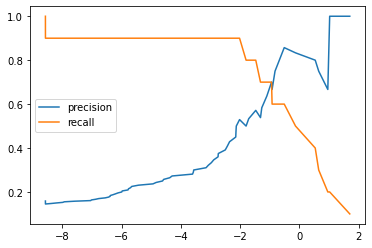

In [100]:
plt.plot(threshold, precision[:-1], label = 'precision')
plt.plot(threshold, recall[:-1], label = 'recall')
plt.legend()

## definir la fonction qui optiisera notre modéle

In [101]:
def model_final(model,X, threshold = 0):
    return model.decision_function(X)> threshold

In [102]:
y_pred = model_final(grid2.best_estimator_,X_test, threshold=-1)

In [103]:
f1_score(y_test, y_pred)

0.7

In [104]:
from sklearn.metrics import recall_score

In [105]:
recall_score(y_test, y_pred)

0.7